# **Trabalho de ICC**
---
Nomes e Número USP:
- Arthur Martins Ferreira de Sousa 14783601
- Gabriel Carbinato 12725411
- Gabriel Ligabô Baba 14571981


# **Parte 1 - Análise Exploratória**

## Bibliotecas e instalação

In [ ]:
!pip install latexify-py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import latexify
import warnings

## Análise

Importando a database para trabalhar

In [ ]:
df = pd.read_csv("/content/TIMES_WorldUniversityRankings_2024.csv", sep = ",")
display(df)

#display(df.to_csv('dataframe.csv', index = False))
#display(df.to_excel('dataframe1.xlsx', index = False))
#print(df.head(5).to_latex())

rank                                               name  \
0             1                               University of Oxford   
1             2                                Stanford University   
2             3              Massachusetts Institute of Technology   
3             4                                 Harvard University   
4             5                            University of Cambridge   
5             6                               Princeton University   
6             7                 California Institute of Technology   
7             8                            Imperial College London   
8             9                 University of California, Berkeley   
9            10                                    Yale University   
10           11                                         ETH Zurich   
11           12                                Tsinghua University   
12           13                          The University of Chicago   
13           14                                  Peking University   
14           15                           Johns Hopkins University   
15           16                         University of Pennsylvania   
16           17                                Columbia University   
17           18              University of California, Los Angeles   
18           19                   National University of Singapore   
19           20                                 Cornell University   
20           21                              University of Toronto   
21           22                                                UCL   
22           23                   University of Michigan-Ann Arbor   
23           24                         Carnegie Mellon University   
24           25                           University of Washington   
25           26                                    Duke University   
26           27                                New York University   
27           28                            Northwestern University   
28           29                            The University of Tokyo   
29          =30                            University of Edinburgh   
30          =30                     Technical University of Munich   
31           32        Nanyang Technological University, Singapore   
32           33           École Polytechnique Fédérale de Lausanne   
33           34                University of California, San Diego   
34           35                            University of Hong Kong   
35           36                    Georgia Institute of Technology   
36           37                            University of Melbourne   
37          =38                              King’s College London   
38          =38                                         LMU Munich   
39           40  Paris Sciences et Lettres – PSL Research Unive...   
40           41                     University of British Columbia   
41           42         University of Illinois at Urbana-Champaign   
42           43                      Shanghai Jiao Tong University   
43           44                                   Fudan University   
44           45                                          KU Leuven   
45           46   London School of Economics and Political Science   
46           47                             Universität Heidelberg   
47           48                     Delft University of Technology   
48           49                                  McGill University   
49           50                               Karolinska Institute   
50           51                           University of Manchester   
51           52                      University of Texas at Austin   
52           53                    Chinese University of Hong Kong   
53           54                                  Monash University   
54          =55                                   Kyoto University   
55          =55                                Zhejiang University   
56           57      

Visualização inicial do arquivo csv, resumo das colunas e número de linhas (serve como auxílio em identificar dados faltantes e possíveis colunas dispensáveis no projeto

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

Aqui estamos removendo e remodelando colunas indesejadas / ainda não-aptas às visualizações gráficas

In [ ]:
# Removendo colunas

cleaned_df = df.drop(columns = ['url', 'nid', 'disabled','aliases','closed', 'website_url', 'member_level', 'unaccredited'], axis = 1)

# Remodelando a coluna de porcentagem de estudantes internacionais

def remove_percentage(percentage):
    if isinstance(percentage, str):
        percentage = percentage.strip()
        percentage = percentage.replace('%', '')
        if percentage != '':
            return float(percentage)/100
    return None

cleaned_df['stats_pc_intl_students'] = cleaned_df['stats_pc_intl_students'].apply(remove_percentage)

In [ ]:
cleaned_df.head(10)

rank                                   name scores_overall  \
0    1                   University of Oxford           98.5   
1    2                    Stanford University           98.0   
2    3  Massachusetts Institute of Technology           97.9   
3    4                     Harvard University           97.8   
4    5                University of Cambridge           97.5   
5    6                   Princeton University           96.9   
6    7     California Institute of Technology           96.5   
7    8                Imperial College London           95.1   
8    9     University of California, Berkeley           94.6   
9   10                        Yale University           94.2   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             96.6                     5   
1                   20             99.0                     1   
2                   30             98.6                     2   
3                   40             97.7                     3   
4                   50             95.8                     7   
5                   60             96.3                     6   
6                   70             96.6                     4   
7                   80             90.9                    12   
8                   90             87.2                    18   
9                  100             94.0                    10   

   scores_research  scores_research_rank  scores_citations  \
0            100.0                     2              99.0   
1             97.8                     8              99.6   
2             96.2                    11              99.7   
3             99.9                     3              99.4   
4            100.0                     1              98.0   
5             97.9                     7              98.8   
6             98.0                     6              95.9   
7             95.5                    12              98.6   
8             98.8                     4              99.0   
9             94.9                    13              97.7   

   scores_citations_rank  scores_industry_income  scores_industry_income_rank  \
0                      5                    98.7                           77   
1                      2                   100.0                           25   
2                      1                   100.0                           16   
3                      3                    84.2                          216   
4                     12                    87.9                          180   
5                      7                    95.1                          118   
6                     38                   100.0                            2   
7                      8                    90.9                          157   
8                      4                    99.4                           63   
9                     18                    86.5                          192   

   scores_international_outlook  scores_international_outlook_rank  \
0                          97.5                                 14   
1                          87.0                                167   
2                          93.8                                 66   
3                          90.8                                119   
4                          97.4                                 15   
5                          89.1                                135   
6                          90.6                                123   
7                          98.3                                  6   
8                          86.8                                171   
9                          82.4                                216   

      record_type        location stats_number_students  \
0  master_account  United Kingdom                21,750   
1         private   United States                14,517   
2         private   United States                11,085   

Informações do novo dataframe limpo

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

Filtrando: A partir daqui iremos filtrar certas colunas do data frame que serão potenciais interesses na análise visual (porém não necessariamente utilizadas)

In [ ]:
print("Top 10 Universidade no ranking geral", "\n")

cleaned_df.iloc[0:10, 0:4] # filtragem por indexação
#cleaned_df.loc[0:10, "rank":"scores_overall_rank"] # filtragem por rótulos

Top 10 Universidade no ranking geral 



rank                                   name scores_overall  \
0    1                   University of Oxford           98.5   
1    2                    Stanford University           98.0   
2    3  Massachusetts Institute of Technology           97.9   
3    4                     Harvard University           97.8   
4    5                University of Cambridge           97.5   
5    6                   Princeton University           96.9   
6    7     California Institute of Technology           96.5   
7    8                Imperial College London           95.1   
8    9     University of California, Berkeley           94.6   
9   10                        Yale University           94.2   

   scores_overall_rank  
0                   10  
1                   20  
2                   30  
3                   40  
4                   50  
5                   60  
6                   70  
7                   80  
8                   90  
9                  100

Visão geral e Disciplinas oferecidas na Universidade de São Paulo

In [ ]:
cleaned_df[cleaned_df.name == "University of São Paulo"]
# ou para resumo, cleaned_df.iloc[237]

rank                     name scores_overall  scores_overall_rank  \
237  201–250  University of São Paulo      55.9–58.6                 2380   

     scores_teaching  scores_teaching_rank  scores_research  \
237             59.8                    75             60.7   

     scores_research_rank  scores_citations  scores_citations_rank  \
237                    82              57.3                    840   

     scores_industry_income  scores_industry_income_rank  \
237                    68.2                          477   

     scores_international_outlook  scores_international_outlook_rank  \
237                          42.5                               1031   

        record_type location stats_number_students  stats_student_staff_ratio  \
237  master_account   Brazil                83,182                       13.9   

     stats_pc_intl_students stats_female_male_ratio  \
237                    0.02                 47 : 53   

                                      subjects_offered  
237  Chemistry,Economics & Econometrics,Business & ...

In [ ]:
#print(cleaned_df.iloc[237, [0,1,2,5,7,9,11,13]].to_latex())

In [ ]:
cleaned_df.loc[237, "subjects_offered"]

'''
Chemistry, Economics and Econometrics, Business and Management,Politics and International Studies (incl Development Studies), Archaeology, Languages, Literature and Linguistics, Mathematics and Statistics, Veterinary Science, Communication and Media Studies, Accounting and Finance, Geography, Civil Engineering, Chemical Engineering, Art, Performing Arts and Design, Mechanical and Aerospace Engineering, Geology, Environmental, Earth and Marine Sciences, History, Philosophy and Theology, General Engineering, Medicine and Dentistry, Electrical and Electronic Engineering, Agriculture and Forestry, Architecture, Physics and Astronomy, Other Health, Education, Law, Biological Sciences, Sociology, Computer Science, Sport Science, Psychology
'''

'\nChemistry, Economics and Econometrics, Business and Management,Politics and International Studies (incl Development Studies), Archaeology, Languages, Literature and Linguistics, Mathematics and Statistics, Veterinary Science, Communication and Media Studies, Accounting and Finance, Geography, Civil Engineering, Chemical Engineering, Art, Performing Arts and Design, Mechanical and Aerospace Engineering, Geology, Environmental, Earth and Marine Sciences, History, Philosophy and Theology, General Engineering, Medicine and Dentistry, Electrical and Electronic Engineering, Agriculture and Forestry, Architecture, Physics and Astronomy, Other Health, Education, Law, Biological Sciences, Sociology, Computer Science, Sport Science, Psychology\n'

Todas Universidades Brasileiras no WUR2024

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Brazil = cleaned_df.loc[cleaned_df['location'] == 'Brazil']
Brazil.sort_values(by = ['scores_research'], ascending = False) #rankeando as universidades brasileira por pontuação na pesquisa

rank                                               name  \
237     201–250                            University of São Paulo   
356     351–400                             University of Campinas   
652     601–800               Federal University of Rio de Janeiro   
650     601–800             Universidade Estadual Paulista (Unesp)   
949    801–1000  Pontifical Catholic University of Rio de Janei...   
856    801–1000                 Federal University of Minas Gerais   
653     601–800          Universidade Federal do Rio Grande do Sul   
858    801–1000        Universidade Federal de São Paulo (UNIFESP)   
857    801–1000             Universidade Federal de Santa Catarina   
1051  1001–1200                   Federal University of São Carlos   
1265  1201–1500                Universidade Federal do ABC (UFABC)   
1141  1001–1200  Pontifical Catholic University of Rio Grande d...   
1270  1201–1500                       Federal University of Lavras   
1267  1201–1500                Universidade Federal do Ceará (UFC)   
1271  1201–1500              Universidade Federal do Paraná (UFPR)   
1706      1501+                          Londrina State University   
1268  1201–1500               Federal University of Espírito Santo   
1473  1201–1500                                Unisinos University   
1231  1201–1500                             University of Brasília   
1276  1201–1500                       Federal University of Viçosa   
1269  1201–1500                        Federal University of Goiás   
1607      1501+                   Universidade Estadual de Maringá   
1263  1201–1500    Universidade do Estado do Rio de Janeiro (UERJ)   
1272  1201–1500                   Federal University of Pernambuco   
1620      1501+                      Fluminense Federal University   
1274  1201–1500                  Federal University of Santa Maria   
1394  1201–1500         Pontifícia Universidade Católica do Paraná   
1610      1501+  Universidade Federal de Ciências da Saúde de P...   
1275  1201–1500                   Federal University of Uberlândia   
1266  1201–1500                      Universidade Federal da Bahia   
1612      1501+               Universidade Federal de Juiz de Fora   
1615      1501+          Universidade Federal de Ouro Preto (UFOP)   
1614      1501+           Federal University of Mato Grosso do Sul   
1616      1501+                         Federal University of Pará   
1573      1501+                             Ceará State University   
1856      1501+                   State University of Ponta Grossa   
1273  1201–1500   Federal University of Rio Grande do Norte (UFRN)   
1605      1501+           Universidade do Estado de Santa Catarina   
1617      1501+             Federal Rural University of Pernambuco   
1606      1501+  Universidade Estadual do Norte Fluminense Darc...   
1711      1501+                  Mackenzie Presbyterian University   
1802      1501+     Pontifical Catholic University of Minas Gerais   
1568      1501+                    Catholic University of Brasília   
1619      1501+                    Universidade Federal de Sergipe   
1796      1501+                           University of Pernambuco   
1613      1501+            Universidade Federal do Maranhão (UFMA)   
1867      1501+  Universidade Tecnológica Federal do Paraná (UT...   
1608      1501+  Universidade Estadual do Oeste do Paraná (Unio...   
1575      1501+  Centro Federal de Educação Tecnológica Celso S...   
1611      1501+                      Federal University of Itajubá   
1621      1501+                   University of Fortaleza (UNIFOR)   
1572      1501+                        University of Caxias do Sul   
1857      1501+                     State University of Santa Cruz   
1618      1501+           Universidade Federal Rural do Semi-Arido   
1854      1501+                          State University of Bahia   
1767      1501+               Universidade Nove de Julho (Uninove)   
2062   Reporter      

## **Medidas Descritivas**

Resumo de medidas de tendência central, dispersão e percentis de cada coluna na database inicial (análise já feita sem dados faltantes pela própria função)

In [ ]:
cleaned_df.describe()

scores_overall_rank  scores_teaching  scores_teaching_rank  \
count         2.673000e+03      1904.000000           2673.000000   
mean          2.945872e+05        29.060662            678.473625   
std           4.486570e+05        13.967201            633.450078   
min           1.000000e+01         9.400000              0.000000   
25%           6.690000e+03        19.400000              0.000000   
50%           1.337000e+04        25.800000            568.000000   
75%           1.000101e+06        34.500000           1236.000000   
max           1.000769e+06        99.000000           1904.000000   

       scores_research  scores_research_rank  scores_citations  \
count      1904.000000           2673.000000       1904.000000   
mean         23.416176            678.473625         52.189706   
std          16.697923            633.450078         25.071342   
min           4.600000              0.000000          3.400000   
25%          11.800000              0.000000         30.400000   
50%          17.250000            568.000000         52.400000   
75%          29.900000           1236.000000         73.225000   
max         100.000000           1904.000000         99.700000   

       scores_citations_rank  scores_industry_income  \
count            2673.000000             1904.000000   
mean              678.473625               47.057405   
std               633.450078               26.150454   
min                 0.000000               15.600000   
25%                 0.000000               22.275000   
50%               568.000000               41.050000   
75%              1236.000000               68.200000   
max              1904.000000              100.000000   

       scores_industry_income_rank  scores_international_outlook  \
count                  2673.000000                   1904.000000   
mean                    678.473625                     49.907143   
std                     633.450078                     21.828249   
min                       0.000000                     16.100000   
25%                       0.000000                     31.975000   
50%                     568.000000                     45.300000   
75%                    1236.000000                     65.400000   
max                    1904.000000                     98.800000   

       scores_international_outlook_rank  stats_student_staff_ratio  \
count                        2673.000000                2673.000000   
mean                          678.473625                  19.130527   
std                           633.450078                  13.450010   
min                             0.000000                   0.300000   
25%                             0.000000                  12.300000   
50%                           568.000000                  16.600000   
75%                          1236.000000                  22.500000   
max                          1904.000000                 333.300000   

       stats_pc_intl_students  
count             2670.000000  
mean                 0.098019  
std                  0.134801  
min                  0.000000  
25%                  0.010000  
50%                  0.050000  
75%                  0.130000  
max                  1.000000

In [ ]:
cleaned_df.loc[:, ['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']].describe()

scores_teaching  scores_research  scores_citations  \
count      1904.000000      1904.000000       1904.000000   
mean         29.060662        23.416176         52.189706   
std          13.967201        16.697923         25.071342   
min           9.400000         4.600000          3.400000   
25%          19.400000        11.800000         30.400000   
50%          25.800000        17.250000         52.400000   
75%          34.500000        29.900000         73.225000   
max          99.000000       100.000000         99.700000   

       scores_industry_income  scores_international_outlook  
count             1904.000000                   1904.000000  
mean                47.057405                     49.907143  
std                 26.150454                     21.828249  
min                 15.600000                     16.100000  
25%                 22.275000                     31.975000  
50%                 41.050000                     45.300000  
75%                 68.200000                     65.400000  
max                100.000000                     98.800000

Países com maior número de universidades avaliadas percentualmente dentro do ranking da WUR2024 (ordem não implica países com melhor desempenho)

In [ ]:
(cleaned_df['location'].value_counts())/(cleaned_df['location'].count())*100

United States               6.546951
Japan                       6.322484
United Kingdom              6.098017
India                       4.638982
Russian Federation          4.040404
Turkey                      3.628881
Pakistan                    3.292181
China                       3.217359
Algeria                     3.217359
Iran                        2.805836
Brazil                      2.506547
Iraq                        2.356902
Spain                       2.244669
Italy                       2.132435
Germany                     1.945380
France                      1.833146
Uzbekistan                  1.795735
Taiwan                      1.795735
Ukraine                     1.571268
South Korea                 1.496446
Poland                      1.459035
Nigeria                     1.459035
Egypt                       1.421624
Australia                   1.384212
Colombia                    1.346801
Indonesia                   1.234568
Chile                       1.197157
S

Matriz de correlação entre variáveis numéricas (não necessariamente todos valores fazem sentido, apenas uma matriz comparando todas as variáveis numéricas, fica a cargo do profissional inferir e testar quais dados fazem sentido)

In [ ]:
cleaned_df.corr()

<ipython-input-63-f2aa83905a59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_df.corr()


scores_overall_rank  scores_teaching  \
scores_overall_rank                           1.000000        -0.700408   
scores_teaching                              -0.700408         1.000000   
scores_teaching_rank                         -0.675296        -0.880663   
scores_research                              -0.782729         0.871223   
scores_research_rank                         -0.674322        -0.697663   
scores_citations                             -0.906615         0.527623   
scores_citations_rank                        -0.673910        -0.520871   
scores_industry_income                       -0.756810         0.678078   
scores_industry_income_rank                  -0.675151        -0.642373   
scores_international_outlook                 -0.679132         0.421367   
scores_international_outlook_rank            -0.675700        -0.393957   
stats_student_staff_ratio                     0.053944        -0.234243   
stats_pc_intl_students                       -0.064596         0.421136   

                                   scores_teaching_rank  scores_research  \
scores_overall_rank                           -0.675296        -0.782729   
scores_teaching                               -0.880663         0.871223   
scores_teaching_rank                           1.000000        -0.703366   
scores_research                               -0.703366         1.000000   
scores_research_rank                           0.852021        -0.852436   
scores_citations                              -0.516233         0.652535   
scores_citations_rank                          0.739265        -0.645962   
scores_industry_income                        -0.694837         0.786352   
scores_industry_income_rank                    0.831077        -0.741861   
scores_international_outlook                  -0.395505         0.567576   
scores_international_outlook_rank              0.662657        -0.541518   
stats_student_staff_ratio                      0.100623        -0.014080   
stats_pc_intl_students                        -0.174075         0.498315   

                                   scores_research_rank  scores_citations  \
scores_overall_rank                           -0.674322         -0.906615   
scores_teaching                               -0.697663          0.527623   
scores_teaching_rank                           0.852021         -0.516233   
scores_research                               -0.852436          0.652535   
scores_research_rank                           1.000000         -0.696575   
scores_citations                              -0.696575          1.000000   
scores_citations_rank                          0.835889         -0.999485   
scores_industry_income                        -0.840791          0.588662   
scores_industry_income_rank                    0.917031         -0.577291   
scores_international_outlook                  -0.578594          0.624062   
scores_international_outlook_rank              0.769566         -0.611268   
stats_student_staff_ratio                     -0.043968          0.043277   
stats_pc_intl_students                        -0.223398          0.427578   

                                   scores_citations_rank  \
scores_overall_rank                            -0.673910   
scores_teaching                                -0.520871   
scores_teaching_rank                            0.739265   
scores_research                                -0.645962   
scores_research_rank                            0.835889   
scores_citations                               -0.999485   
scores_citations_rank                           1.000000   
scores_industry_income                         -0.586968   
scores_industry_income_rank                     0.772207   
scores_international_outlook                   -0.622795   
scores_international_outlook_rank               0.791112   
stats_student_staff_ratio                      -0.059073   
stats_pc_intl_students                         -0.190438   


In [ ]:
col = ['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']
selected_corr = cleaned_df.loc[:, col].corr()
selected_corr

scores_teaching  scores_research  \
scores_teaching                      1.000000         0.871223   
scores_research                      0.871223         1.000000   
scores_citations                     0.527623         0.652535   
scores_industry_income               0.678078         0.786352   
scores_international_outlook         0.421367         0.567576   

                              scores_citations  scores_industry_income  \
scores_teaching                       0.527623                0.678078   
scores_research                       0.652535                0.786352   
scores_citations                      1.000000                0.588662   
scores_industry_income                0.588662                1.000000   
scores_international_outlook          0.624062                0.483999   

                              scores_international_outlook  
scores_teaching                                   0.421367  
scores_research                                   0.567576  
scores_citations                                  0.624062  
scores_industry_income                            0.483999  
scores_international_outlook                      1.000000

In [ ]:
# Definindo os 20 países mais desenvolvidos na ordem em que esses países aparecem (com índice de primeira ocorência à esquerda)

developed_countries = cleaned_df['location'].drop_duplicates().head(20)

influential_countries = pd.DataFrame({'20_Countries': developed_countries})
influential_countries



20_Countries
0        United Kingdom
1         United States
10          Switzerland
11                China
18            Singapore
20               Canada
28                Japan
30              Germany
34            Hong Kong
36            Australia
39               France
44              Belgium
47          Netherlands
49               Sweden
61          South Korea
94   Russian Federation
102             Denmark
119             Austria
120             Finland
126              Norway

Procurando os cursos com mais oferecimento por universidade

In [ ]:
# dando um split em todas matérias separadas com vírgula e atribuindo-as numa lista
all_subjects = cleaned_df['subjects_offered'].str.split(',').explode()

# contando ocorrência de cada matéria
subject_counts = all_subjects.str.strip().value_counts()

# criando data frame
subjects_df = pd.DataFrame({'Subject': subject_counts.index, 'Count': subject_counts.values})

# arranjando por ordem decrescente
subjects_df = subjects_df.sort_values(by='Count', ascending=False)
subjects_df


Subject  Count
0                                    Computer Science   2277
1                               Business & Management   2267
2                                Accounting & Finance   1965
3                                 Biological Sciences   1946
4                            Mathematics & Statistics   1914
5                            Literature & Linguistics   1913
6                                           Languages   1913
7                            Economics & Econometrics   1891
8                 Electrical & Electronic Engineering   1858
10                                General Engineering   1769
9                                           Education   1769
11                                          Chemistry   1764
12                                       Other Health   1700
13                                Physics & Astronomy   1683
14                                                Law   1665
15                      Communication & Media Studies   1664
16                 Mechanical & Aerospace Engineering   1658
17                                         Psychology   1653
18                                          Sociology   1650
19                                  Civil Engineering   1635
20                                            History   1630
21                              Philosophy & Theology   1630
22  Politics & International Studies (incl Develop...   1604
23                            Earth & Marine Sciences   1593
24                                      Environmental   1593
25                                            Geology   1593
27                                                Art   1591
26                           Performing Arts & Design   1591
28                               Medicine & Dentistry   1366
29                               Chemical Engineering   1364
30                                       Architecture   1238
31                                      Sport Science   1218
32                             Agriculture & Forestry   1159
33                                          Geography   1080
34                                        Archaeology    742
35                                 Veterinary Science    597

# **Parte 2 - Visualização**

## TESTES

## Gráfico de Barras

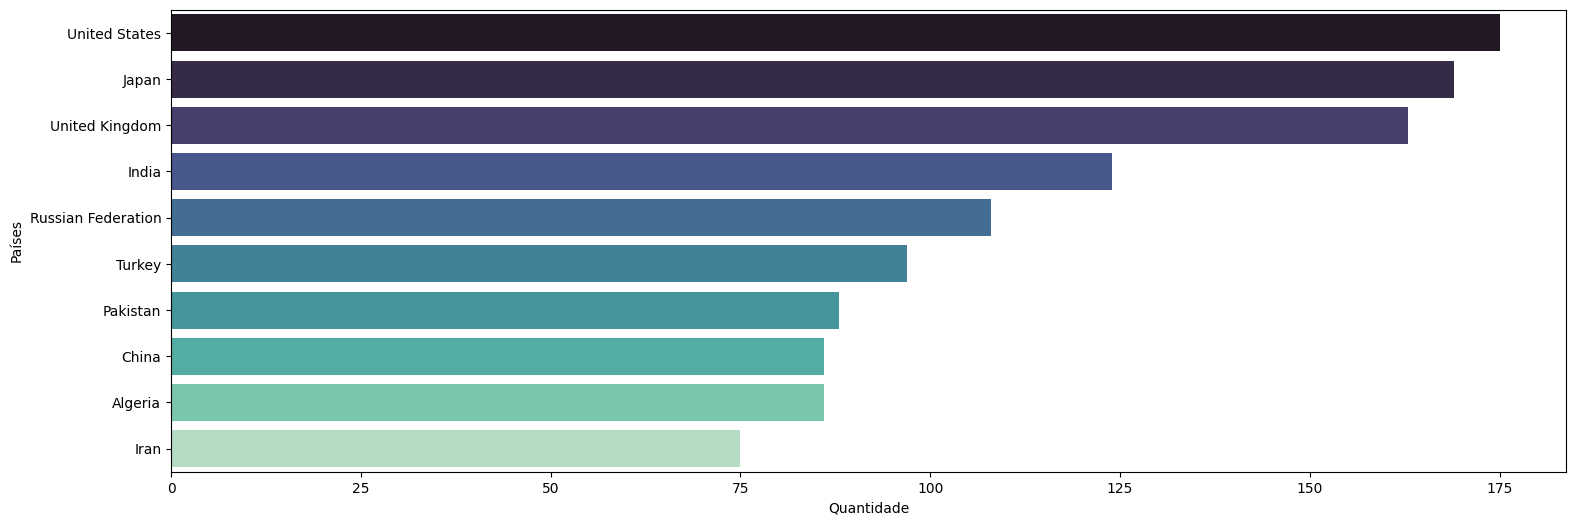

In [ ]:
top10_countries = cleaned_df['location'].value_counts().head(10)
#print(top10_countries)
plt.figure(figsize=(18,6))
plt.ylabel("Países")
sns.barplot(y=top10_countries.index, x=top10_countries, palette='mako')
plt.xlabel("Quantidade")
#plt.savefig('barras1.png')
plt.show()

## Boxplots

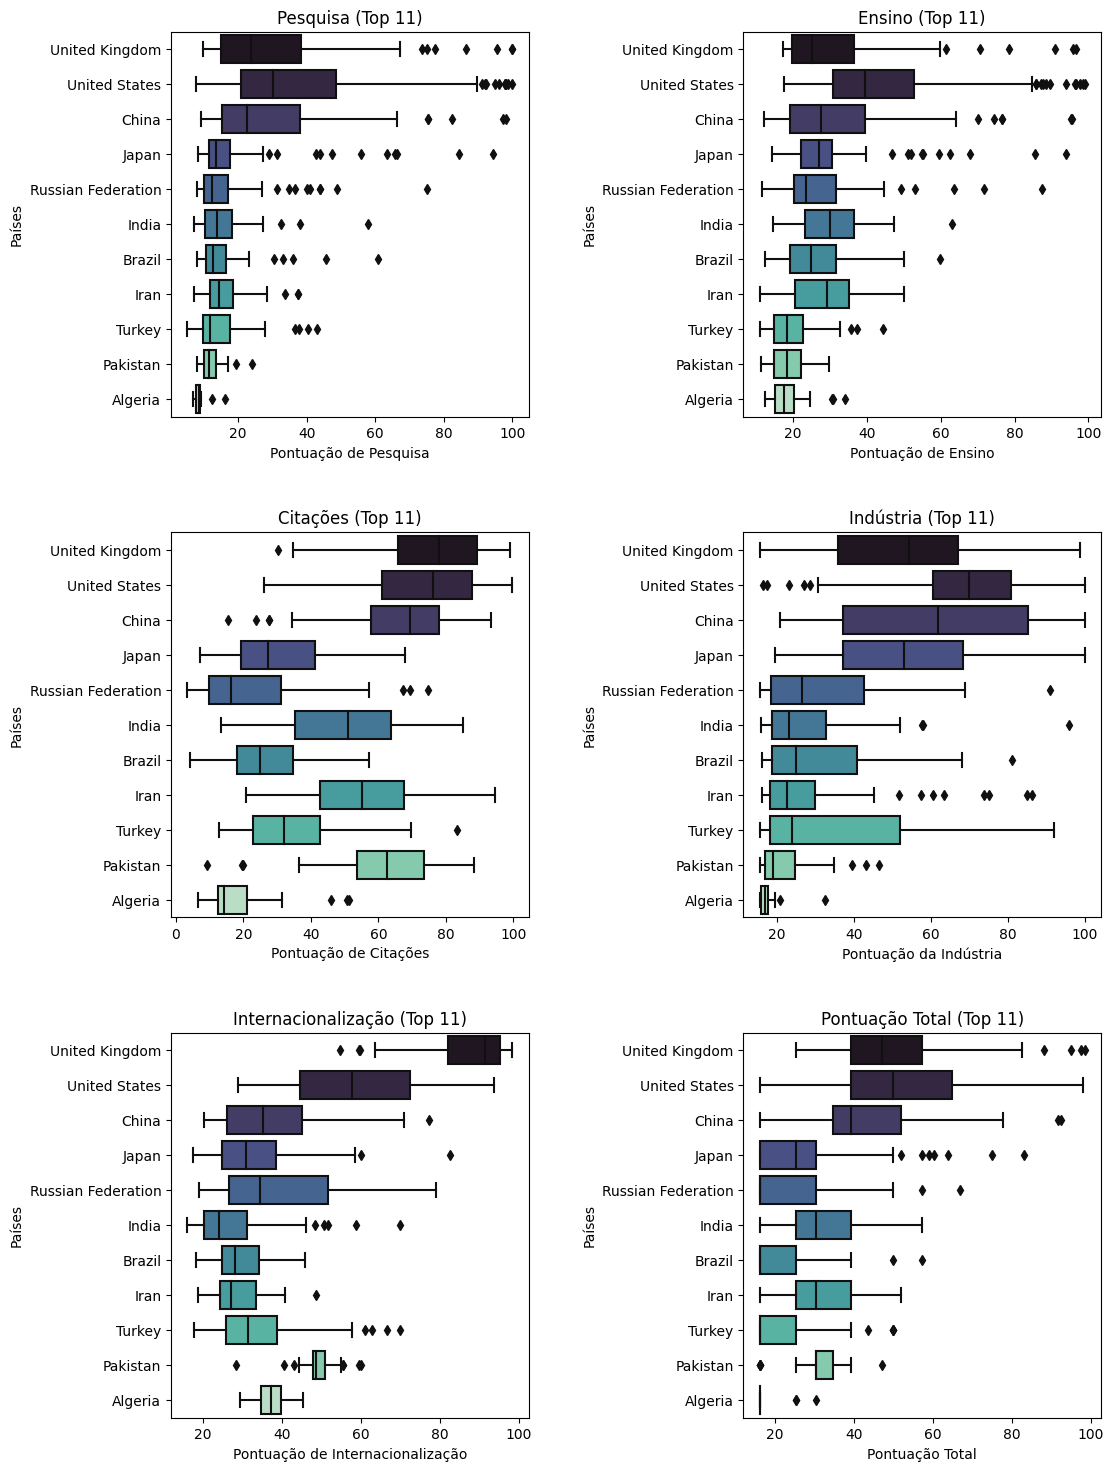

In [ ]:
top11_countries = cleaned_df['location'].value_counts().head(11).index
df_top11 = cleaned_df[cleaned_df['location'].isin(top11_countries)]

def convert_scores(score):
    if isinstance(score, str):
        score = score.replace('–', '-')
        if '-' in score:
            values = score.split('-')
            return sum(float(v) for v in values) / len(values)
        else:
            return float(score)
    else:
        return score

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_top11['scores_overall'] = df['scores_overall'].apply(convert_scores)

# Converta a coluna 'scores_overall' para tipo numérico
    df_top11['scores_overall'] = pd.to_numeric(df_top11['scores_overall'], errors='coerce')

# Crie uma figura com seis subgráficos (3 linhas x 2 colunas)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), gridspec_kw={'hspace': 0.3,'wspace': 0.6})

# Crie boxplots para cada coluna em subgráficos específicos
    sns.boxplot(x='scores_research', y='location', data=df_top11, ax=axes[0, 0], palette='mako')
    axes[0, 0].set(xlabel='Pontuação de Pesquisa', ylabel='Países')
    axes[0, 0].set_title('Pesquisa (Top 11)')

    sns.boxplot(x='scores_teaching', y='location', data=df_top11, ax=axes[0, 1], palette='mako')
    axes[0, 1].set(xlabel='Pontuação de Ensino', ylabel='Países')
    axes[0, 1].set_title('Ensino (Top 11)')

    sns.boxplot(x='scores_citations', y='location', data=df_top11, ax=axes[1, 0], palette='mako')
    axes[1, 0].set(xlabel='Pontuação de Citações', ylabel='Países')
    axes[1, 0].set_title('Citações (Top 11)')

    sns.boxplot(x='scores_industry_income', y='location', data=df_top11, ax=axes[1, 1], palette='mako')
    axes[1, 1].set(xlabel='Pontuação da Indústria', ylabel='Países')
    axes[1, 1].set_title('Indústria (Top 11)')

    sns.boxplot(x='scores_international_outlook', y='location', data=df_top11, ax=axes[2, 0], palette='mako')
    axes[2, 0].set(xlabel='Pontuação de Internacionalização', ylabel='Países')
    axes[2, 0].set_title('Internacionalização (Top 11)')

    sns.boxplot(x='scores_overall', y='location', data=df_top11, ax=axes[2, 1], palette='mako')
    axes[2, 1].set(xlabel='Pontuação Total', ylabel='Países')
    axes[2, 1].set_title('Pontuação Total (Top 11)')

# Ajuste o layout para evitar sobreposição
    plt.tight_layout()

# Exiba a figura
    plt.show()

## Heatmap (correlation)

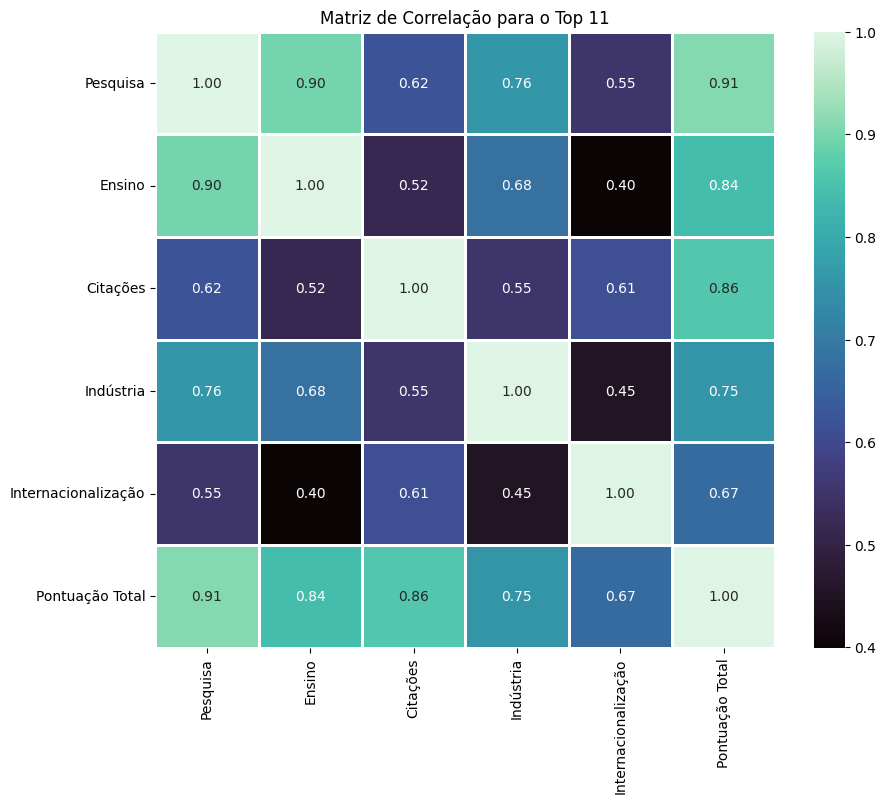

In [ ]:
columns_to_convert = ['scores_research', 'scores_teaching', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_top11.loc[:, columns_to_convert] = df_top11[columns_to_convert].apply(pd.to_numeric, errors='coerce')


correlation_matrix = df_top11[columns_to_convert + ['scores_overall']].corr()

xticklabels = ['Pesquisa', 'Ensino', 'Citações','Indústria', 'Internacionalização', 'Pontuação Total']
yticklabels = ['Pesquisa', 'Ensino', 'Citações','Indústria', 'Internacionalização', 'Pontuação Total']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt='.2f', linewidths=.8, xticklabels=xticklabels, yticklabels=yticklabels)  #ou cmap = 'coolmap'
plt.title('Matriz de Correlação para o Top 11')
plt.show()

## Proporção entre homens e mulheres

Na primeira análise, escolheu-se a coluna stats_female_male_ratio. Nela estão os dados da proporção entre mulheres e homens nas universidades, com as porcentagens relativas de cada. Assim, optou-se por separar as colunas, pois seus dados estavam dispostos da forma x: y, o que dificultaria a coleta de dados.

Definiu-se as novas colunas:
*   Porcentagem_Mulheres
*   Porcentagem_Homens

Por fim, converteu-se os dados para valores numéricos, para evitar erros de tipagem de dados.

In [ ]:
cleaned_df[['Porcentagem_Mulheres', 'Porcentagem_Homens']] = cleaned_df['stats_female_male_ratio'].str.split(':', expand=True)
cleaned_df['Porcentagem_Mulheres'] = pd.to_numeric(cleaned_df['Porcentagem_Mulheres'].str.strip())
cleaned_df['Porcentagem_Homens'] = pd.to_numeric(cleaned_df['Porcentagem_Homens'].str.strip())
#cleaned_df

In [ ]:
print(cleaned_df['Porcentagem_Mulheres'].mean())
print(cleaned_df['Porcentagem_Homens'].mean())
print(cleaned_df['Porcentagem_Mulheres'].median())
print(cleaned_df['Porcentagem_Homens'].median())
print(cleaned_df['Porcentagem_Mulheres'].mode())
print(cleaned_df['Porcentagem_Homens'].mode())

51.27325581395349
48.72674418604651
53.0
47.0
0    55.0
Name: Porcentagem_Mulheres, dtype: float64
0    45.0
Name: Porcentagem_Homens, dtype: float64


Primeiramente, optou-se por plotar um scatterplot, com o intuito de visualizar como os dados estavam distribuídos de forma geral para todas as universidades. Dessa maneira, seria possível fazer a primeira visualização sobre a faixa de concentração de dados, os valores mínimos e máximos que meus dados estavam assumindo, e também ter ideias sobre quais outros gráficos me dariam informações valiosas sobre a análise. Além disso, visualizar se a conversão de colunas do bloco anterior estava correta.

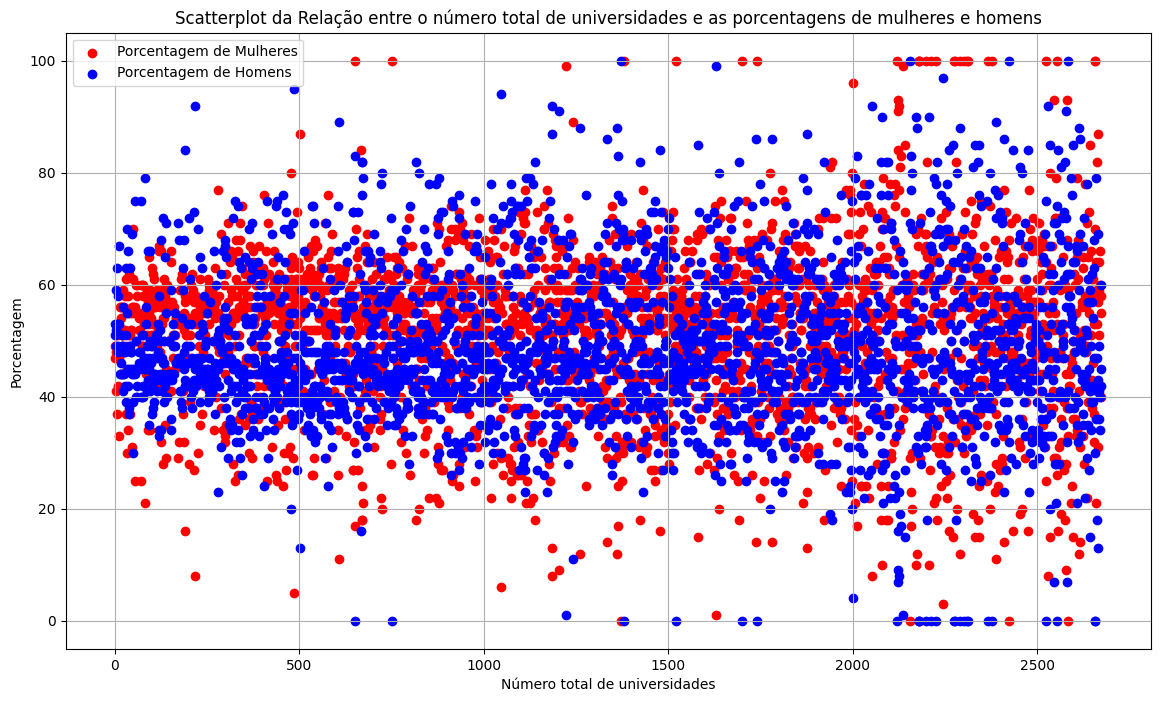

In [ ]:
# Cálculo do número total de universidades
count_universities = range(1, len(df) + 1)

# Criação de um scatterplot e suas configurações visuais
plt.figure(figsize=(14, 8))
plt.scatter(count_universities, cleaned_df['Porcentagem_Mulheres'], color='red', label='Porcentagem de Mulheres')
plt.scatter(count_universities, cleaned_df['Porcentagem_Homens'], color='blue', label='Porcentagem de Homens')
plt.title('Scatterplot da Relação entre o número total de universidades e as porcentagens de mulheres e homens')
plt.xlabel('Número total de universidades')
plt.ylabel('Porcentagem')
plt.legend()
plt.grid(True)
plt.show()

testes

In [ ]:
#count_universities_array = np.array(count_universities)

# Verificando o shape do array NumPy
#print(count_universities_array.shape)

In [ ]:
#sns.regplot(x=count_universities_array[:min_length], y=cleaned_df['Porcentagem_Mulheres'][:min_length], scatter=False, color='red', label='Regression - Mulheres', line_kws={'linewidth': 5})
#sns.kdeplot(x=count_universities[:min_length], y=cleaned_df['Porcentagem_Mulheres'][:min_length], color='red', fill=True, alpha=0.5)

#sns.regplot(x=count_universities_array[:min_length], y=cleaned_df['Porcentagem_Homens'][:min_length], scatter=False, color='blue', label='Regression - Homens', line_kws={'linewidth': 5})
#sns.kdeplot(x=count_universities[:min_length], y=cleaned_df['Porcentagem_Homens'][:min_length], color='blue', fill=True, alpha=0.5)

#plt.xlabel('Número total de universidades')
#plt.ylabel('Porcentagem')

#plt.legend(prop={'size': 9})
#plt.show()


fim testes

Em uma segunda análise, pensou-se em fazer um boxplot para visualizar algumas medidas descritivas, como os quartis, a médias, a mediana e possíveis outliers. Tais informações serão importantes para comparações entre as universidades.

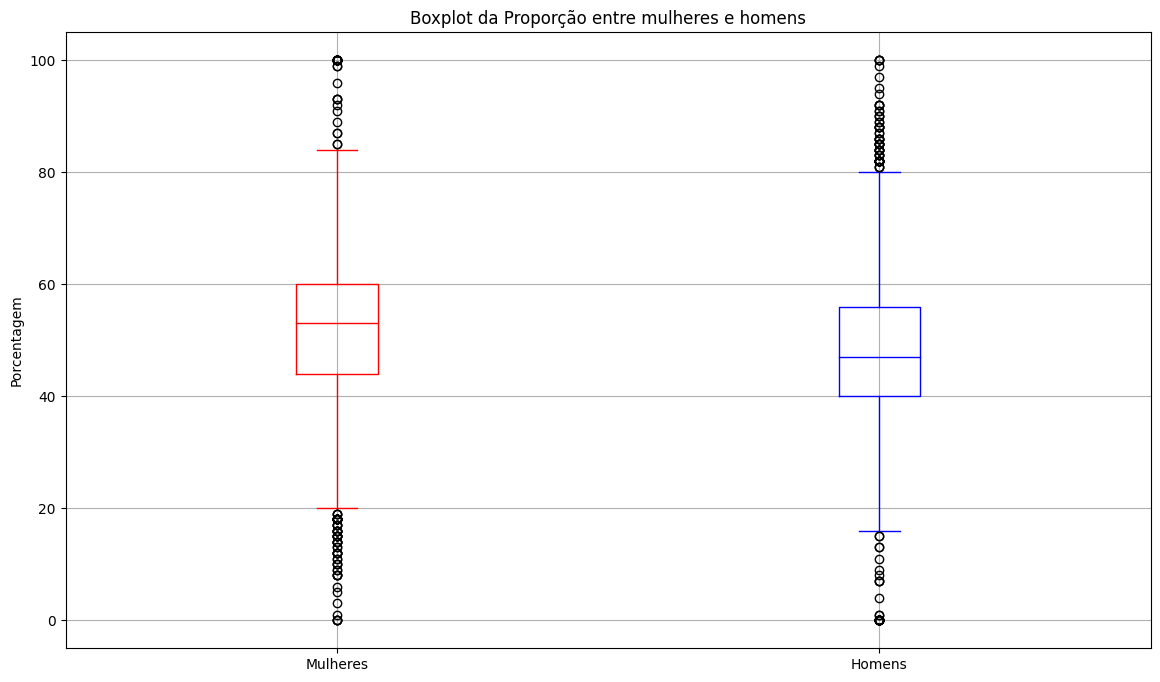

In [ ]:
# Criação de um boxplot e suas configurações visuais
plt.figure(figsize=(14, 8))
cleaned_df.boxplot(column='Porcentagem_Mulheres', color='red', positions=[1])
cleaned_df.boxplot(column='Porcentagem_Homens', color='blue', positions=[2])
plt.title('Boxplot da Proporção entre mulheres e homens')
plt.ylabel('Porcentagem')
plt.xticks([1, 2], ['Mulheres', 'Homens'])
plt.show()

Em uma terceira análise, após obter as principais medidas descritivas dessas duas colunas, pensou-se em plotar outro scatterplot, porém focado nas 10 universidades melhores ranqueadas. Dessa forma, poderíamos inferir comparações entre essas universidades, levando em consideração a média, mediana e quartis encontrados anteriormente.

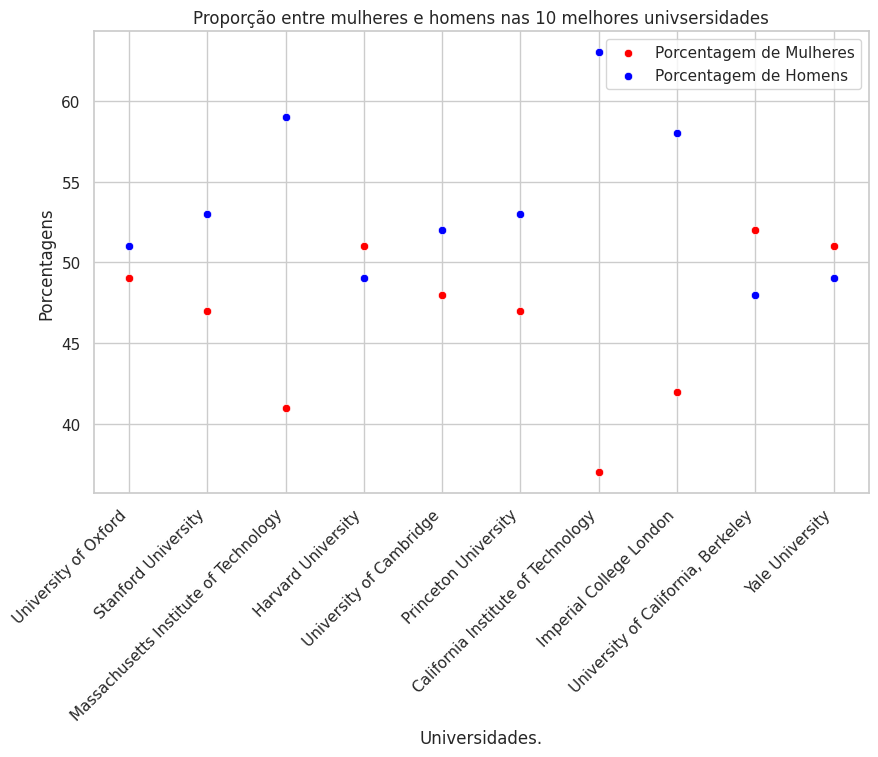

In [ ]:
# Criação de um scatterplot e suas configurações visuais para as 10 univseridades melhores rankeadas
df_top10univ = cleaned_df.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='name',
    y='Porcentagem_Mulheres',
    data=df_top10univ,
    color='red',
    label='Porcentagem de Mulheres'
)
scatter = sns.scatterplot(
    x='name',
    y='Porcentagem_Homens',
    data=df_top10univ,
    color='blue',
    label='Porcentagem de Homens'
)
plt.xlabel('Universidades.')
plt.ylabel('Porcentagens')
plt.title('Proporção entre mulheres e homens nas 10 melhores univsersidades')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

Por fim, já com as análises gerais prontas, tentou-se verificar se a distribuição dos dados se assemelha a alguma distribuição estatística conhecida, estudada em outras disciplinas. Dessa maneira, plotou-se um histograma para as mulheres e outro para os homens, e depois os juntamos.

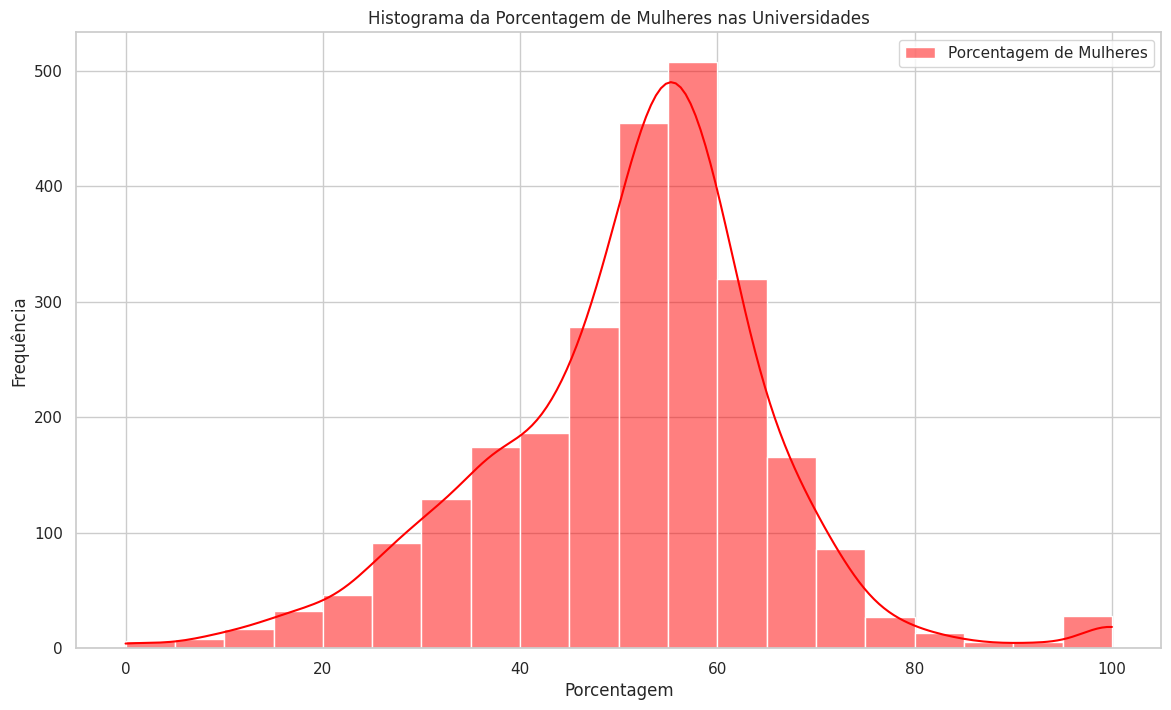

In [ ]:
# Criação de um histograma e suas configurações visuais
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['Porcentagem_Mulheres'], bins=20, color='red', kde=True, label='Porcentagem de Mulheres')
plt.title('Histograma da Porcentagem de Mulheres nas Universidades')
plt.xlabel('Porcentagem')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

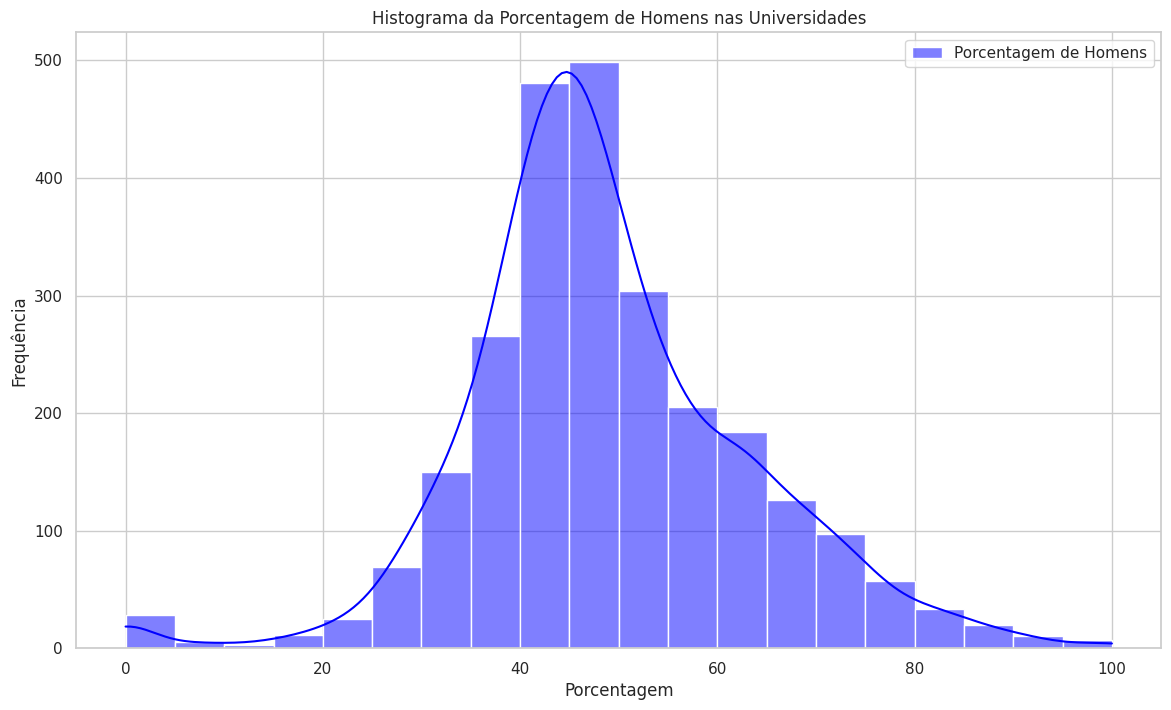

In [ ]:
# Criação de um histograma e suas configurações visuais
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['Porcentagem_Homens'], bins=20, color='blue', kde=True, label='Porcentagem de Homens')
plt.title('Histograma da Porcentagem de Homens nas Universidades')
plt.xlabel('Porcentagem')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

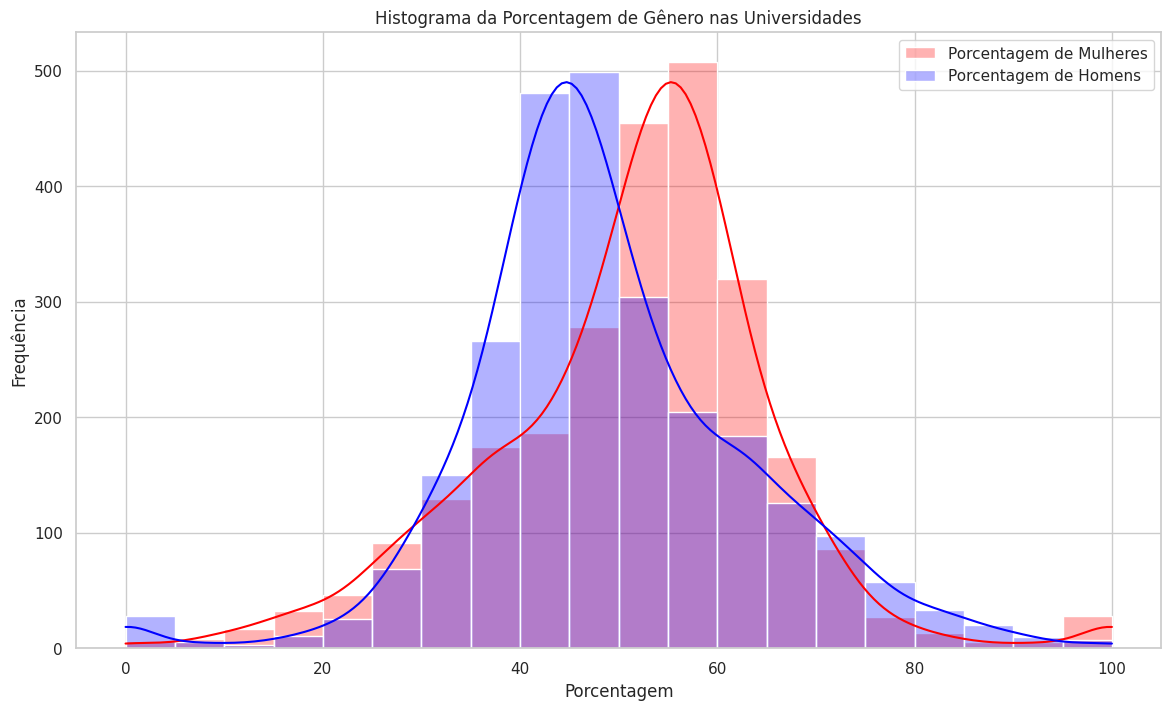

In [ ]:
# Criação de um histograma e suas configurações visuais
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['Porcentagem_Mulheres'], bins=20, color='red', kde=True, label='Porcentagem de Mulheres', alpha =0.3)
sns.histplot(cleaned_df['Porcentagem_Homens'], bins=20, color='blue', kde=True, label='Porcentagem de Homens', alpha = 0.3)
plt.title('Histograma da Porcentagem de Gênero nas Universidades')
plt.xlabel('Porcentagem')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


## Análise de Scores

Agora, na primeira análise desse outro parâmetro, pensou-se em fazer um boxplot com os 5 tipos de pontuação visualizados nas colunas. Dessa maneira, iremos obter medidas descritivas acerca da média, mediana, quartis e outliers sobre cada uma das pontuações. Dessa forma, poderemos fazer diversas comparações entre as universidades, países e até mesmo com a nossa universidade.

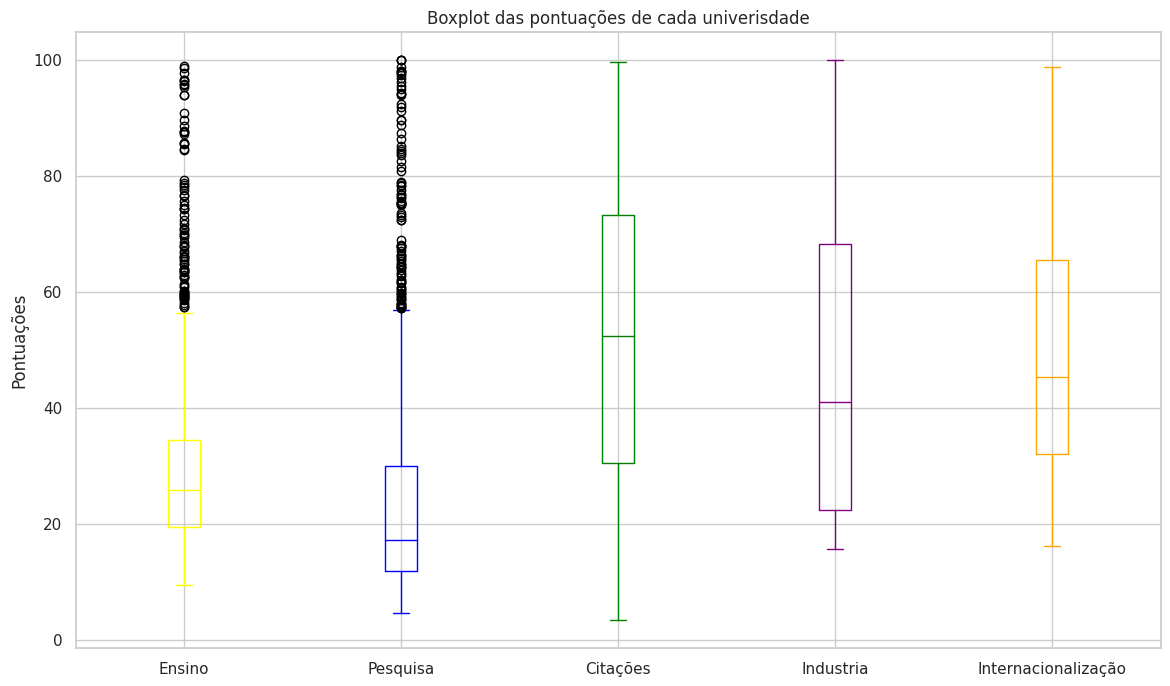

In [ ]:
# Criação de um boxplot e suas configurações visuais
plt.figure(figsize=(14, 8))
cleaned_df.boxplot(column='scores_teaching', color='yellow', positions=[1])
cleaned_df.boxplot(column='scores_research', color='blue', positions=[2])
cleaned_df.boxplot(column='scores_citations', color='green', positions=[3])
cleaned_df.boxplot(column='scores_industry_income', color='purple', positions=[4])
cleaned_df.boxplot(column='scores_international_outlook', color='orange', positions=[5])
plt.title('Boxplot das pontuações de cada univerisdade')
plt.ylabel('Pontuações')
plt.xticks([1, 2, 3, 4, 5], ['Ensino', 'Pesquisa', 'Citações', 'Industria', 'Internacionalização' ])
plt.show()

Na segunda análise, suspeitou-se que havia certa concentração de pontuações em algumas regiões inferiores para os tipos de pesquisa e ensino, pois eles apresentaram muitos outliers, e os outros tipos não. Então, pensou-se em fazer um gráfico de violino para visualizar a incidência dos dados em cada tipo.

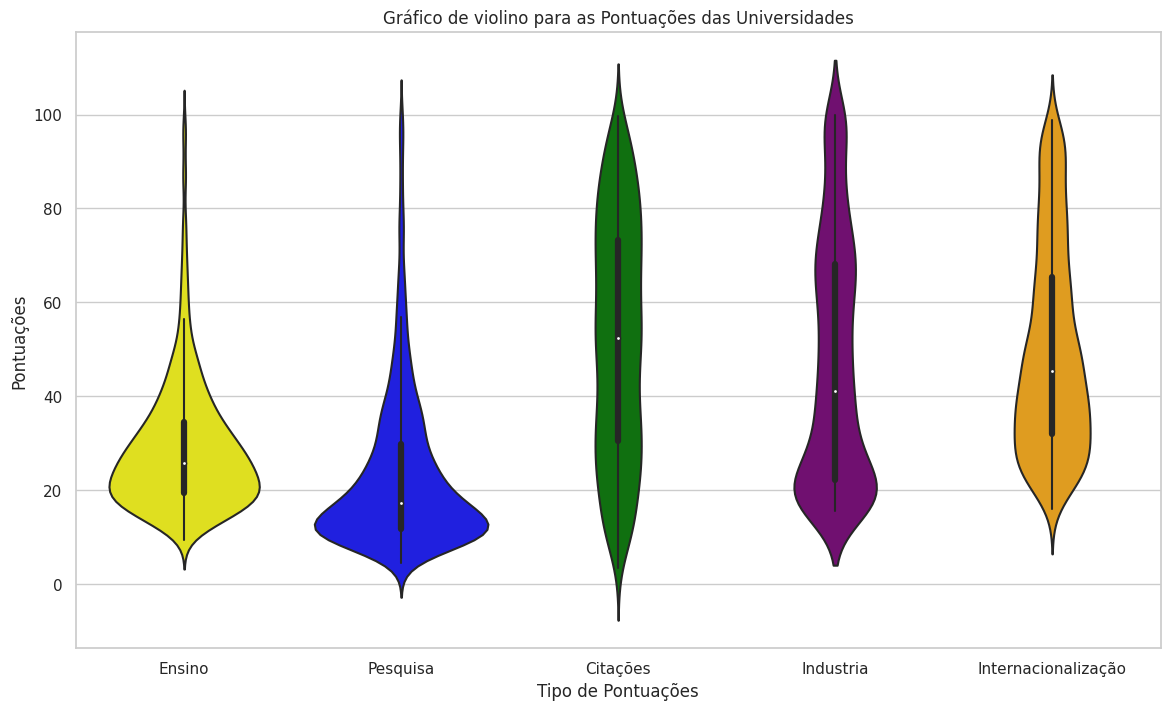

In [ ]:
# Criação de um gráfico de violino e suas configurações visuais
colors = ['yellow', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(14, 8))
sns.violinplot(x='variable', y='value', data=pd.melt(cleaned_df[['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']]), palette=colors)
plt.title('Gráfico de violino para as Pontuações das Universidades')
plt.ylabel('Pontuações')
plt.xlabel('Tipo de Pontuações')
plt.xticks([0, 1, 2, 3, 4], ['Ensino', 'Pesquisa', 'Citações', 'Industria', 'Internacionalização'])
plt.show()

Com as medidas descritivas e algumas informações já obtidas, fez-se uma terceira análise com um mapa de dispersão relacionando cada uma das pontuações. Dessa maneira, poderemos inferir sobre as correlações, tendências e distribuições dos dados obtidos.

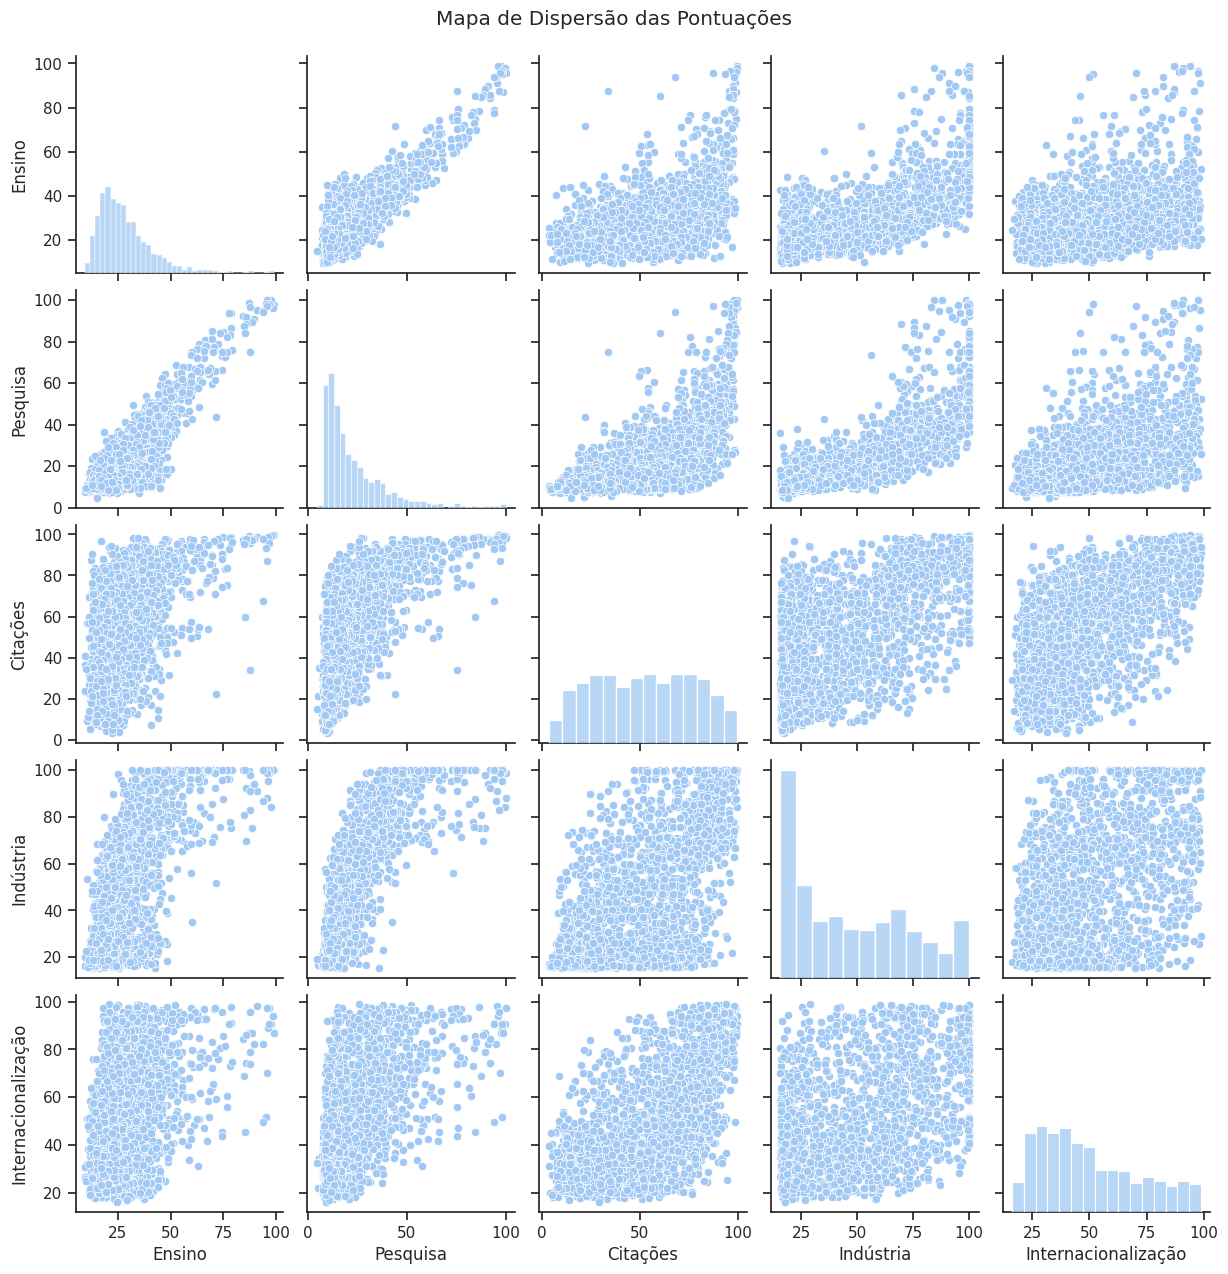

In [ ]:
# Criação de um mapa de dispersao e suas configurações visuais
columns_to_plot = ['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']
df_selected = cleaned_df[columns_to_plot]
df_selected.columns = ['Ensino', 'Pesquisa', 'Citações', 'Indústria', 'Internacionalização']
sns.set(style="ticks", palette="pastel")
sns.pairplot(df_selected)
plt.suptitle('Mapa de Dispersão das Pontuações', y=1.02)
plt.show()

Nessa outra análise, fizemos um scatterplot apenas para as 10 universidades melhor ranqueadas, a fim de fazer análises e deduções acerca de quais são os pontos fortes (scores mais altos) e quais são os pontos fracos (scores mais baixos) de cada universidade desse grupo.

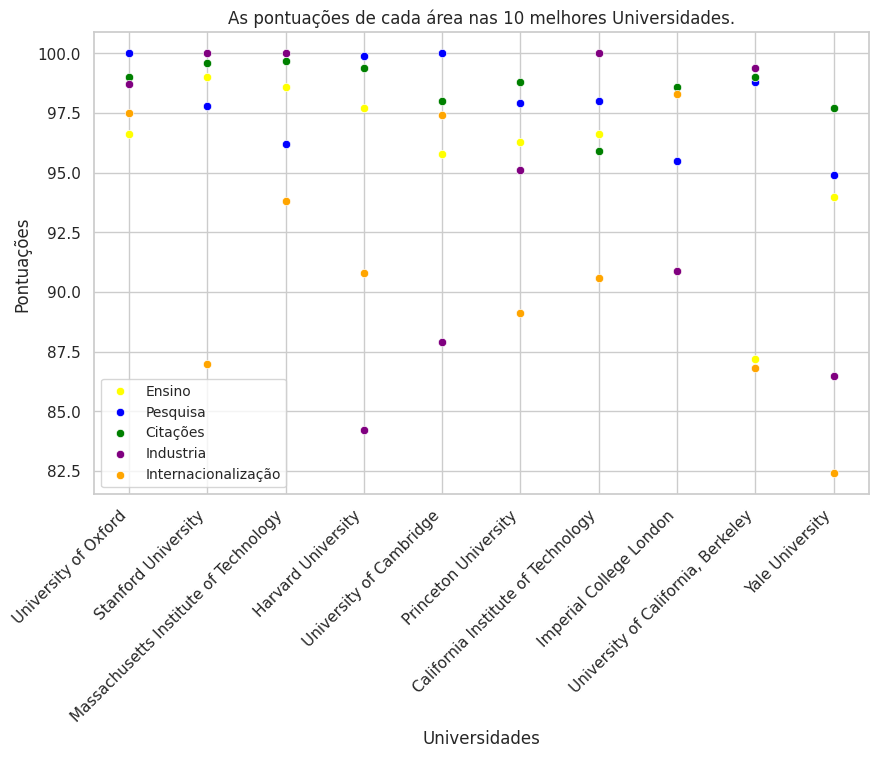

In [ ]:
# Criação de um scatterplot e suas configurações visuais para as 10 univseridades melhores rankeadas
df_top10 = cleaned_df.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='name',
    y='scores_teaching',
    data=df_top10,
    color='yellow',
    label='Ensino'
)
scatter = sns.scatterplot(
    x='name',
    y='scores_research',
    data=df_top10,
    color='blue',
    label='Pesquisa'
)
scatter = sns.scatterplot(
    x='name',
    y='scores_citations',
    data=df_top10,
    color='green',
    label='Citações'
)
scatter = sns.scatterplot(
    x='name',
    y='scores_industry_income',
    data=df_top10,
    color='purple',
    label='Industria'
)
scatter = sns.scatterplot(
    x='name',
    y='scores_international_outlook',
    data=df_top10,
    color='orange',
    label='Internacionalização'
)
plt.xlabel('Universidades')
plt.ylabel('Pontuações')
plt.title('As pontuações de cada área nas 10 melhores Universidades.')
plt.legend(fontsize = "10")
plt.xticks(rotation=45, ha='right')
plt.show()


Por fim, já com as análises gerais prontas, tentou-se verificar se a distribuição dos dados se assemelha a alguma distribuição estatística conhecida, estudada em outras disciplinas. Dessa maneira, plotou-se um histograma para cada tipo de pontuação.

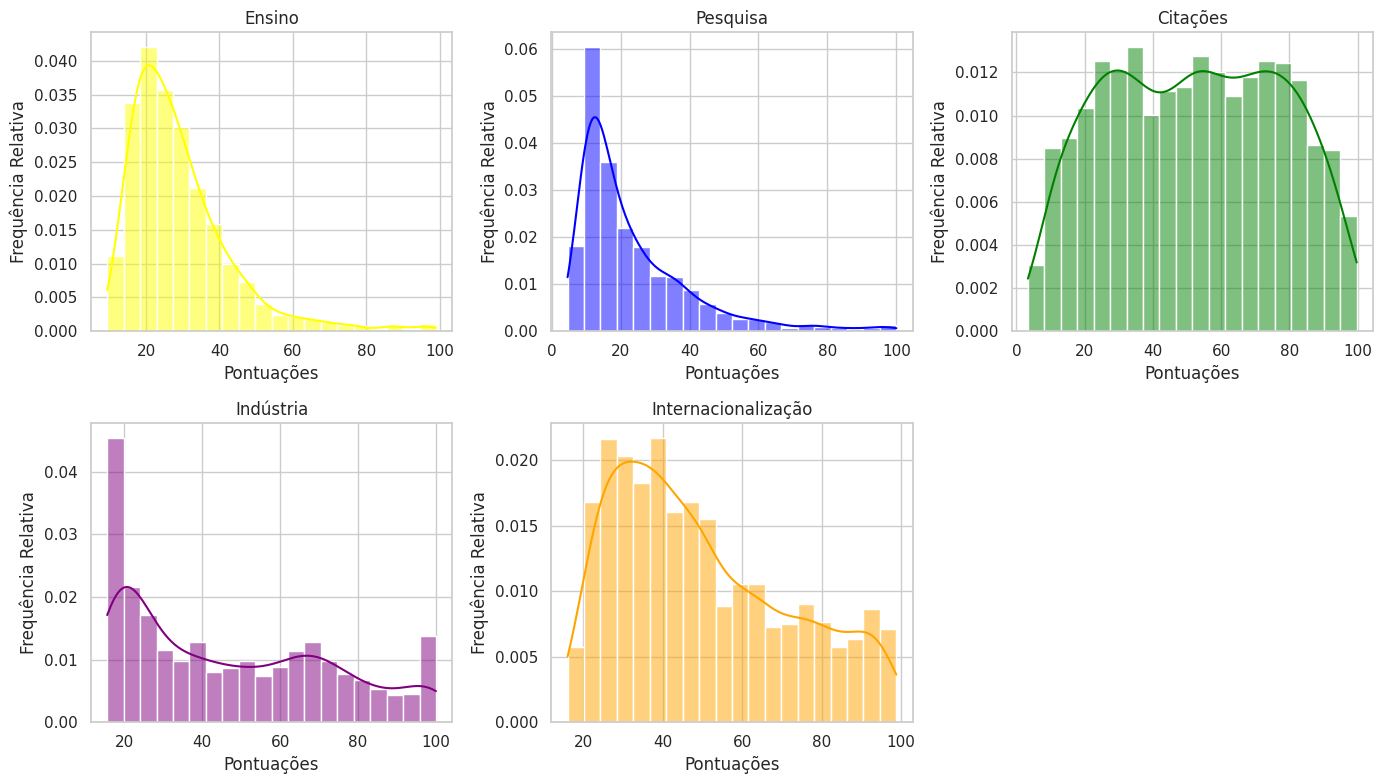

In [ ]:
# Calculate relative frequency
total_samples = len(cleaned_df)

# Define a function to plot histograms with relative frequency
def plot_relative_frequency(data, color, title):
    sns.histplot(data, color=color, bins=20, kde=True, stat='density')
    plt.title(title)
    plt.xlabel('Pontuações')
    plt.ylabel('Frequência Relativa')

# Create subplots
plt.figure(figsize=(14, 8))

# Histogram for scores_teaching with relative frequency
plt.subplot(2, 3, 1)
plot_relative_frequency(cleaned_df['scores_teaching'], 'yellow', 'Ensino')

# Histogram for scores_research with relative frequency
plt.subplot(2, 3, 2)
plot_relative_frequency(cleaned_df['scores_research'], 'blue', 'Pesquisa')

# Histogram for scores_citations with relative frequency
plt.subplot(2, 3, 3)
plot_relative_frequency(cleaned_df['scores_citations'], 'green', 'Citações')

# Histogram for scores_industry_income with relative frequency
plt.subplot(2, 3, 4)
plot_relative_frequency(cleaned_df['scores_industry_income'], 'purple', 'Indústria')

# Histogram for scores_international_outlook with relative frequency
plt.subplot(2, 3, 5)
plot_relative_frequency(cleaned_df['scores_international_outlook'], 'orange', 'Internacionalização')

# Adjust layout
plt.tight_layout()

# Show histograms
plt.show()

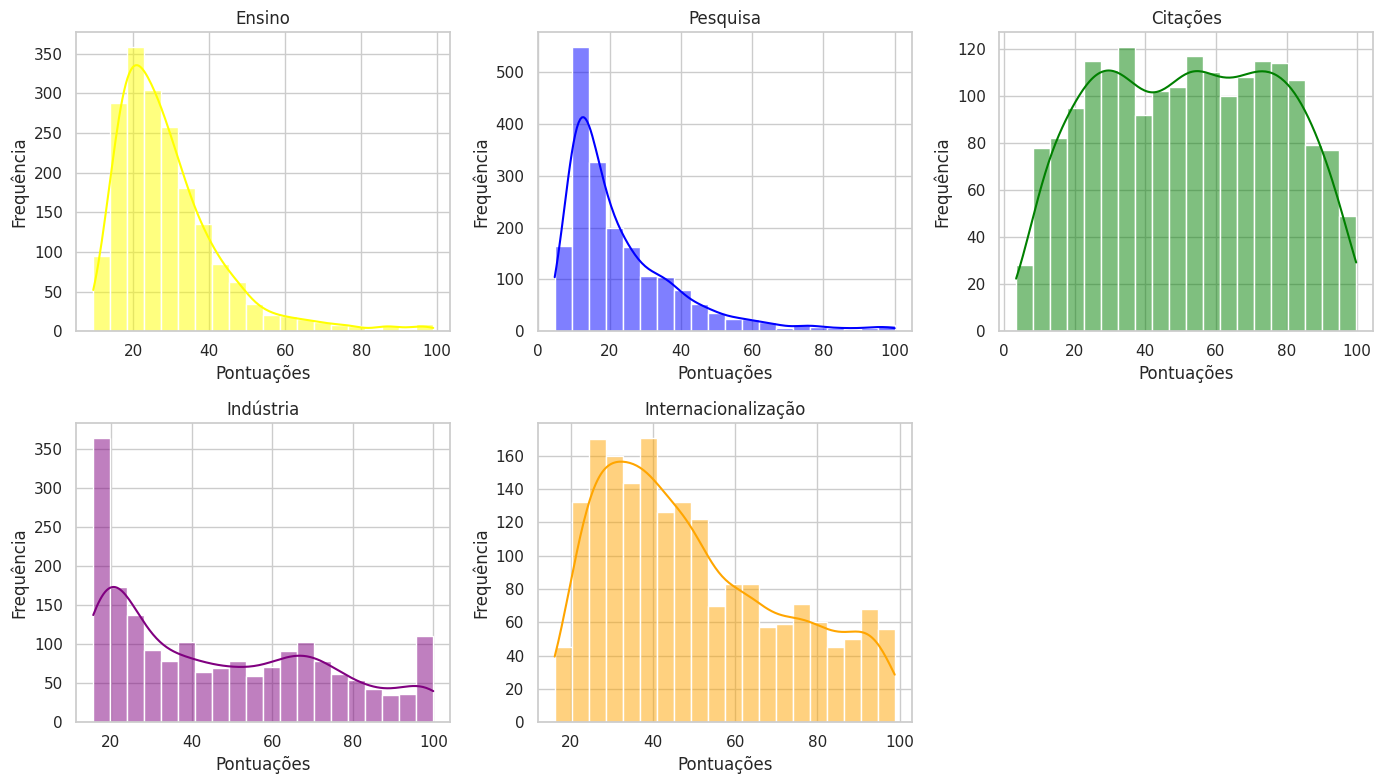

In [ ]:
cols = ['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']
filtered_data = cleaned_df[cols].dropna()

plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.histplot(filtered_data['scores_teaching'], color='yellow', bins=20, kde=True)
plt.title('Ensino')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')

plt.subplot(2, 3, 2)
sns.histplot(filtered_data['scores_research'], color='blue', bins=20, kde=True)
plt.title('Pesquisa')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')

plt.subplot(2, 3, 3)
sns.histplot(filtered_data['scores_citations'], color='green', bins=20, kde=True)
plt.title('Citações')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')

plt.subplot(2, 3, 4)
sns.histplot(filtered_data['scores_industry_income'], color='purple', bins=20, kde=True)
plt.title('Indústria')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')

plt.subplot(2, 3, 5)
sns.histplot(filtered_data['scores_international_outlook'], color='orange', bins=20, kde=True)
plt.title('Internacionalização')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


## estudantes internacionais pelo número de estudantes

Nessa análise de alunos internacionais, fez-se também um boxplot para avaliar as medidas descritivas abordadas anteriormente. Com essa analise poderiamos fazer comparacoes com as universidades no geral, além das universidades brasileiras.

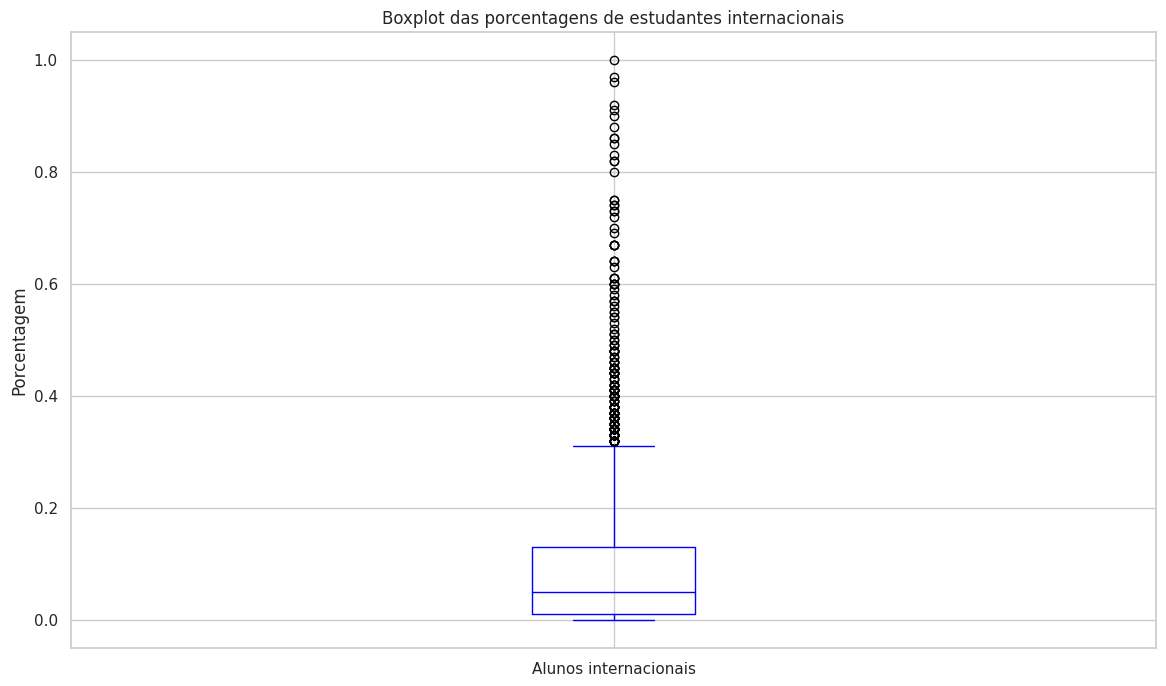

In [ ]:
# Criação de um boxplot e suas configurações visuais
plt.figure(figsize=(14, 8))
cleaned_df.boxplot(column='stats_pc_intl_students', color='blue', positions=[1])
plt.title('Boxplot das porcentagens de estudantes internacionais')
plt.ylabel('Porcentagem')
plt.xticks([1], ['Alunos internacionais'])
plt.show()

Como visualizado no boxplot, observamos que possivelmente há uma concentração de dados na região inferior. Então, resolvemos fazer outro gráfico que melhor contribua para ver onde esses dados estão focalizados. Poderíamos escolher novamente o gráfico de violino, mas, como o trabalho busca, além de tudo, explorar análises gráficas que não conhecemos, decidimos fazer um gráfico de densidade hexagonal. Nele, podemos inferir muito sobre a distribuição dos dados e suas concentrações.

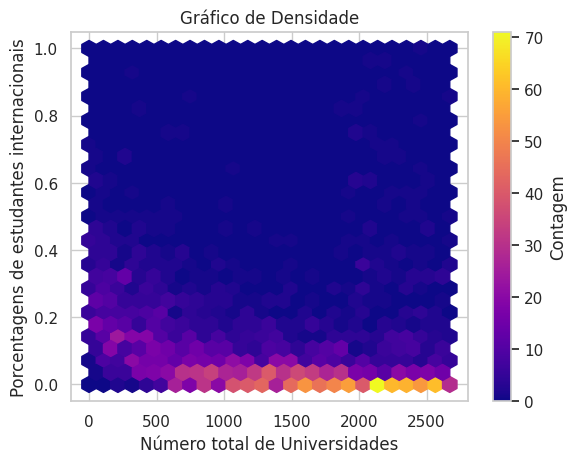

In [ ]:
# Criação de um gráfico de densidade em hexabin e suas configurações visuais
plt.hexbin(range(len(cleaned_df)), cleaned_df['stats_pc_intl_students'], gridsize=25, cmap='plasma')
plt.xlabel('Número total de Universidades')
plt.ylabel('Porcentagens de estudantes internacionais')
plt.title('Gráfico de Densidade')
cb = plt.colorbar()
cb.set_label('Contagem')
plt.show()

Por fim, novamente fizemos um histograma, a fim de verificar se os dados se assemelham a alguma distribuição conhecida.

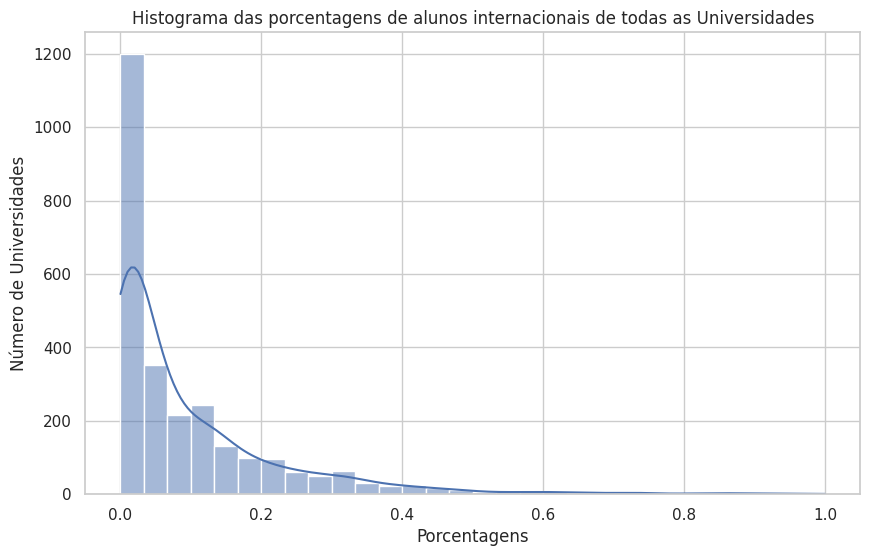

In [ ]:
# Criação de um histograma e suas configurações visuais
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='stats_pc_intl_students', bins=30, kde=True)
plt.xlabel('Porcentagens')
plt.ylabel('Número de Universidades')
plt.title('Histograma das porcentagens de alunos internacionais de todas as Universidades')
plt.show()


## Cursos

Nessa outra análise, pensou-se em fazer um gráfico de barras simples, apenas para visualizar quais cursos são mais oferecidos nas universidades. Apesar de ser uma análise simples, poderemos comparar com a nossa universidade e também ver quais áreas estão tendo mais relevância.

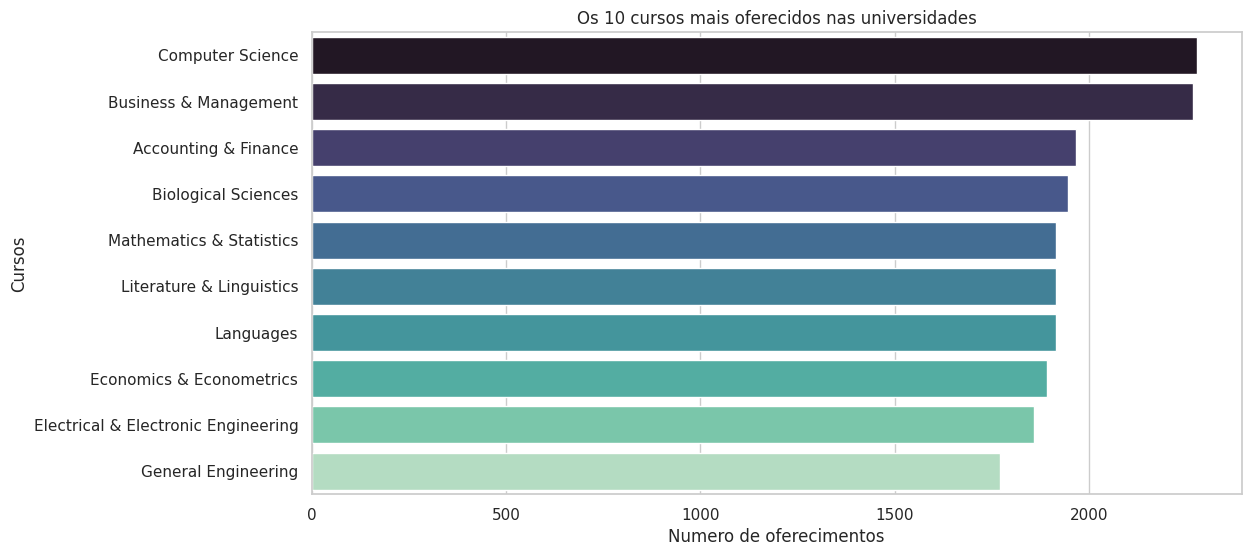

In [ ]:
# Criação de um gráfico de barras e suas configurações visuais
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Subject', data=subjects_df.head(10), palette='mako')
plt.xlabel('Numero de oferecimentos')
plt.ylabel('Cursos')
plt.title('Os 10 cursos mais oferecidos nas universidades')
plt.savefig("myfig.png")
plt.show()

## Análise Usp

In [ ]:
df_usp = cleaned_df.iloc[237]
df_usp

rank                                                                           201–250
name                                                           University of São Paulo
scores_overall                                                               55.9–58.6
scores_overall_rank                                                               2380
scores_teaching                                                                   59.8
scores_teaching_rank                                                                75
scores_research                                                                   60.7
scores_research_rank                                                                82
scores_citations                                                                  57.3
scores_citations_rank                                                              840
scores_industry_income                                                            68.2
scores_industry_income_rank                

Comparando tópicos de interesse da USP com a média de outras universidades

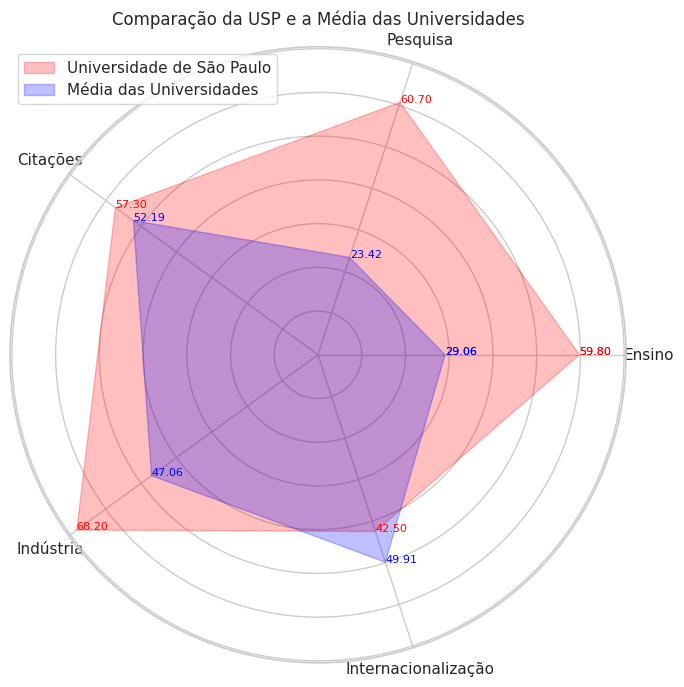

In [ ]:
categories = ['scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook']
new_labels = ['Ensino', 'Pesquisa', 'Citações', 'Indústria', 'Internacionalização']

average_scores = cleaned_df[categories].mean()
usp_scores = cleaned_df[cleaned_df['name'] == 'University of São Paulo'][categories].mean()

labels=np.array(new_labels)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

usp_scores = np.concatenate((usp_scores,[usp_scores[0]]))
average_scores = np.concatenate((average_scores,[average_scores[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, usp_scores, color='red', alpha=0.25)
ax.fill(angles, average_scores, color='blue', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.legend(['Universidade de São Paulo', 'Média das Universidades'])

for angle, value in zip(angles, usp_scores):
    ax.text(angle, value, f"{value:.2f}",color = 'red', fontsize = 8)

for angle, value in zip(angles, average_scores):
    ax.text(angle, value, f"{value:.2f}", color='blue', fontsize = 8)

ax.legend(['Universidade de São Paulo', 'Média das Universidades'])
plt.title("Comparação da USP e a Média das Universidades")
plt.show()

Comparando USP com as top 50 Universidades

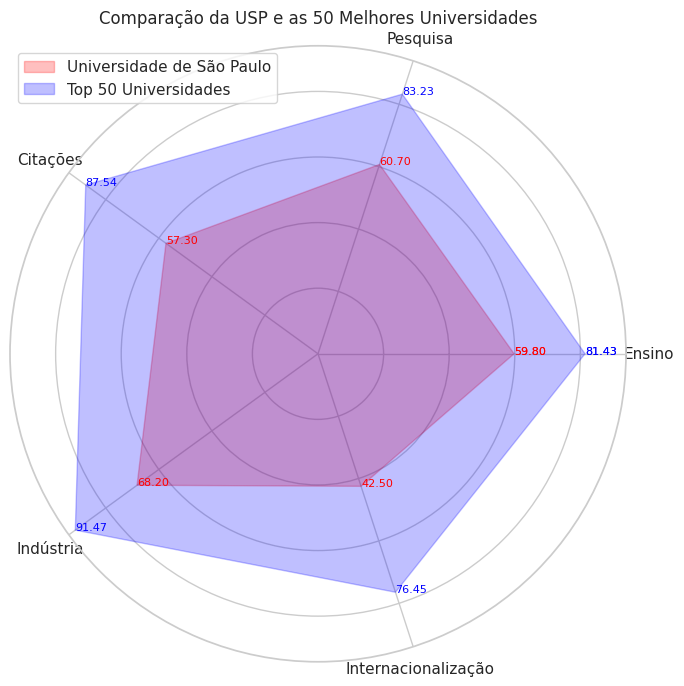

In [ ]:
top_50 = cleaned_df.nlargest(50, categories)  # Select top 50 rows based on 'average_scores'

top_50_scores = top_50[categories].mean()
top_50_scores = np.concatenate((top_50_scores, [top_50_scores[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, usp_scores, color='red', alpha=0.25)
ax.fill(angles, top_50_scores, color='blue', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.legend(['Universidade de São Paulo', 'Top 50 Universidades'])

for angle, value in zip(angles, usp_scores):
    ax.text(angle, value, f"{value:.2f}",color='red', fontsize = 8)

for angle, value in zip(angles, top_50_scores):
    ax.text(angle, value, f"{value:.2f}", color='blue', fontsize = 8)
plt.title("Comparação da USP e as 50 Melhores Universidades")
plt.show()


Comparando USP com top 100

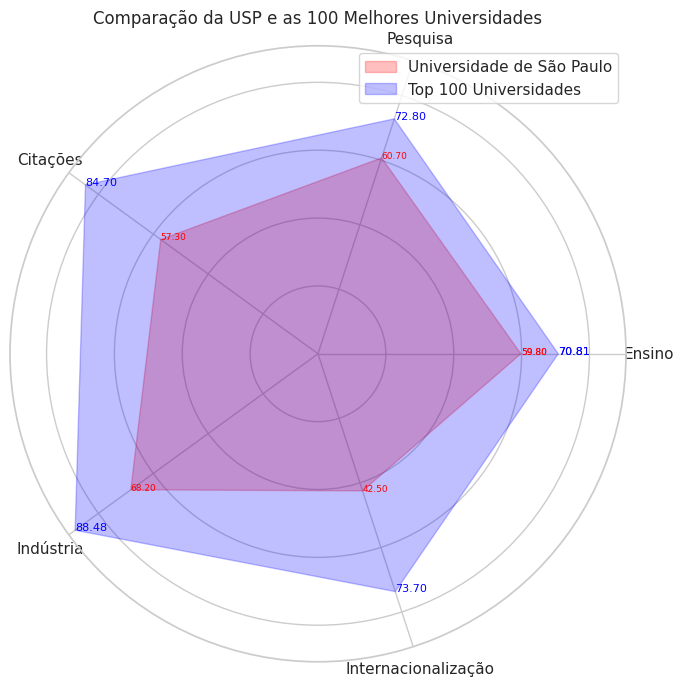

In [ ]:
top_100 = cleaned_df.nlargest(100, categories)

top_100_scores = top_100[categories].mean().values

top_100_scores = np.concatenate((top_100_scores,[top_100_scores[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, usp_scores, color='red', alpha=0.25)
ax.fill(angles, top_100_scores, color='blue', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.legend(['Universidade de São Paulo', 'Top 100 Universidades'])

for angle, value in zip(angles, usp_scores):
    ax.text(angle, value, f"{value:.2f}",color='red', fontsize = 6.5)

for angle, value in zip(angles, top_100_scores):
    ax.text(angle, value, f"{value:.2f}", color='blue', fontsize = 8)
plt.title("Comparação da USP e as 100 Melhores Universidades")
plt.show()

# **Parte 3 - Análise estatistica**

In [ ]:
!pip install scikit-posthocs

Hipótese: As pontuações de citações, em média, são maiores do que as demais pontuações avaliativas.

Nesse primeiro bloco de código mais longo, fez-se as configurações do teste estatístico. Foi utilizado como base a comparação feita pelo professor em sala de aula para os pokémons de base 1 e 4. Dessa forma, nessa primeira etapa, definiu-se os 3 tipos de teste de hipótese, além do nível de significância de 5%.

Também foi feita uma limpeza e configuração dos dados, criando listas para cada uma das colunas de interesse, removendo os elementos ausentes. Além disso, foi feita a contagem do número de elementos de cada coluna para que, posteriormente, pudéssemos calcular o valor de ratio no poder estatístico.

In [ ]:
import statsmodels.stats.power as statsmodelspower
import scipy.stats as stats
from enum import Enum
import pandas
import scikit_posthocs as sp

stacked_column = pd.concat([df['scores_teaching'],
                            df['scores_research'],
                            df['scores_citations'],
                            df['scores_industry_income'],
                            df['scores_international_outlook']], ignore_index=True)

class CurveAlternativeHypothesis(str, Enum):
    LESS = "less"
    GREATER = "greater"
    BOTH = "two-sided"
alpha = 0.05
_alternative = CurveAlternativeHypothesis.LESS
lista_scores_research = df['scores_research'].astype(float).dropna().tolist()
lista_scores_citations = df['scores_citations'].astype(float).dropna().tolist()
lista_scores_teaching = df['scores_teaching'].astype(float).dropna().tolist()
lista_scores_industry_income = df['scores_industry_income'].astype(float).dropna().tolist()
lista_scores_international_outlook = df['scores_international_outlook'].astype(float).dropna().tolist()
count_scores_teaching = df['scores_teaching'].count()
count_scores_research = df['scores_research'].count()
count_scores_citations = df['scores_citations'].count()
count_scores_industry_income = df['scores_industry_income'].count()
count_scores_international_outlook = df['scores_international_outlook'].count()
print(f'Contagem da coluna scores_teaching: {count_scores_teaching}')
print(f'Contagem da coluna scores_research: {count_scores_research}')
print(f'Contagem da coluna scores_citations: {count_scores_citations}')
print(f'Contagem da coluna scores_industry_income: {count_scores_industry_income}')
print(f'Contagem da coluna scores_international_outlook: {count_scores_international_outlook}')

Contagem da coluna scores_teaching: 1904
Contagem da coluna scores_research: 1904
Contagem da coluna scores_citations: 1904
Contagem da coluna scores_industry_income: 1904
Contagem da coluna scores_international_outlook: 1904


A partir desses valores, foi possível aplicar o teste de poder estatístico. Como as colunas têm a mesma quantidade de elementos, o valor de ratio é 1 para quaisquer um dos casos, e nobs1 também será sempre 1904, e alpha, como dito anteriormente, 0,05.

In [ ]:
power_analysis = statsmodelspower.TTestIndPower()
power = power_analysis.power(effect_size=0.5, ratio=1, alpha=alpha, nobs1=1904, alternative="larger")
print("o poder do teste estatístico é:", power)

o poder do teste estatístico é: 1.0


Obtivemos o valor 1 para o poder estatístico, e suspeitamos de algum erro. Visto que, embora seja conceitualmente possível que o poder estatístico seja 1, na prática, é raro alcançar esse valor devido às complexidades e variabilidades dos dados observados.

Um dos possíveis motivos para encontrarmos 1 no valor do teste de poder estatístico é que o tamanho da amostra é grande o suficiente para detectar até mesmo efeitos pequenos com uma probabilidade extremamente alta.

Uma alternativa para obtermos um valor possivelmente existente na prática seria diminuir o tamanho do efeito. Isso indica uma diferença ou efeito menor entre os grupos ou variáveis em estudo.

In [ ]:
power_analysis = statsmodelspower.TTestIndPower()
power = power_analysis.power(effect_size=0.2, ratio=1, alpha=alpha, nobs1=1904, alternative="larger")
print(power)

0.999999999660487


Chegou-se a um valor muito próximo a 1, e estatisticamente mais "possível". Assim como justificado anteriormente, apesar de diminuirmos o efeito e ainda assim obtermos um valor alto para o poder estatístico, tal fato está atrelado à grande quantidade de elementos que temos, e além disso, em mesmas quantidades, representando um ratio igual a 1.

Posteriormente, seguimos com o teste de hipótese. Nesse caso, queremos mostrar que, em média, a coluna de citações é maior que as demais. Há uma distinção fundamental entre métodos paramétricos, que são aplicados apenas em distribuições gaussianas, e métodos não paramétricos, que não assumem uma distribuição normal. Caso a distribuição seja gaussiana, é mais indicado utilizar testes paramétricos, pois apresentam um desempenho superior. Para verificar se a distribuição é ou não gaussiana, pode-se realizar o teste de Shapiro-Wilk.

In [ ]:
stat, p = stats.shapiro(stacked_column)
print(p)
print(stat)

0.0
0.916475236415863


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


O p valor foi muito próximo a 0, a mensagem de aviso indica que o p-valor pode não ser preciso para tamanhos de amostra muito grandes (N > 5000). Isso é apenas uma precaução para informar que a interpretação do p-valor pode não ser totalmente confiável para conjuntos de dados muito grandes. Por precaução podemos calcular o p valor para cada uma das colunas separadamente.

In [ ]:
stat1, p1 = stats.shapiro(df['scores_research'])
print(p1)
print(stat1)

3.783505853677006e-44
0.7906796336174011


In [ ]:
stat2, p2 = stats.shapiro(df['scores_citations'])
print(p2)
print(stat2)

6.630092928198683e-21
0.9655610918998718


In [ ]:
stat3, p3 = stats.shapiro(df['scores_teaching'])
print(p3)
print(stat3)

5.852891577748716e-39
0.8522858023643494


In [ ]:
stat4, p4 = stats.shapiro(df['scores_industry_income'])
print(p4)
print(stat4)

2.1472978650397382e-32
0.9083309173583984


In [ ]:
stat5, p5 = stats.shapiro(df['scores_international_outlook'])
print(p5)
print(stat5)

3.643257360931786e-28
0.9344174265861511


Como dito anteriormente e calculado agora, os p valores de todas as colunas individualmente são muito próximos de zero e consideravelmente menores que alpha.

Caso o valor de p (p-value) seja inferior a alfa, podemos rejeitar a hipótese de que a distribuição é gaussiana. Portanto, é possível utilizar um teste-t se o valor de p for superior a alfa, enquanto que, caso contrário, podemos recorrer ao teste U de Mann-Whitney. Neste caso, refutamos a normalidade e optamos pelo teste U de Mann-Whitney.

Assim, o p-valor de qualquer um dos dois testes retornados vai indicar se rejeitamos ou não nossa hipótese nula de que as médias das pontuações de uma primeira coluna selecionada são maiores do que a coluna de citações.

Foram feitos testes comparando as colunas duas a duas com a coluna de citações. Ou seja, comparou-se uma a uma as colunas que continham as outras pontuações com a que tinha pontuações de citações.

In [ ]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    stat, p = stats.ttest_ind(lista_scores_research, lista_scores_citations, alternative=_alternative)
else:
    print('Sample does not look Gaussian (reject H0)')
    stat, p = stats.mannwhitneyu(lista_scores_research, lista_scores_citations, alternative=_alternative)
print(p)
print(stat)
if p > alpha:
    print('Samples come from same distribution (fail to reject H0)')
else:
    if _alternative == 'greater':
        print('A greater B (reject H0)')
    elif _alternative == 'less':
        print('A is lesser than B (reject H0)')
    else:
        print('A is different than B (reject H0)')

Sample does not look Gaussian (reject H0)
3.078725602760721e-272
617421.5
A is lesser than B (reject H0)


In [ ]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    stat, p = stats.ttest_ind(lista_scores_teaching, lista_scores_citations, alternative=_alternative)
else:
    print('Sample does not look Gaussian (reject H0)')
    stat, p = stats.mannwhitneyu(lista_scores_teaching, lista_scores_citations, alternative=_alternative)
print(p)
print(stat)
if p > alpha:
    print('Samples come from same distribution (fail to reject H0)')
else:
    if _alternative == 'greater':
        print('A greater B (reject H0)')
    elif _alternative == 'less':
        print('A is lesser than B (reject H0)')
    else:
        print('A is different than B (reject H0)')

Sample does not look Gaussian (reject H0)
1.0602056384025308e-183
832936.5
A is lesser than B (reject H0)


In [ ]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    stat, p = stats.ttest_ind(lista_scores_industry_income, lista_scores_citations, alternative=_alternative)
else:
    print('Sample does not look Gaussian (reject H0)')
    stat, p = stats.mannwhitneyu(lista_scores_industry_income, lista_scores_citations, alternative=_alternative)
print(p)
print(stat)
if p > alpha:
    print('Samples come from same distribution (fail to reject H0)')
else:
    if _alternative == 'greater':
        print('A greater B (reject H0)')
    elif _alternative == 'less':
        print('A is lesser than B (reject H0)')
    else:
        print('A is different than B (reject H0)')

Sample does not look Gaussian (reject H0)
5.831149873665983e-12
1582469.5
A is lesser than B (reject H0)


In [ ]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    stat, p = stats.ttest_ind(lista_scores_international_outlook, lista_scores_citations, alternative=_alternative)
else:
    print('Sample does not look Gaussian (reject H0)')
    stat, p = stats.mannwhitneyu(lista_scores_international_outlook, lista_scores_citations, alternative=_alternative)
print(p)
print(stat)
if p > alpha:
    print('Samples come from same distribution (fail to reject H0)')
else:
    if _alternative == 'greater':
        print('A greater B (reject H0)')
    elif _alternative == 'less':
        print('A is lesser than B (reject H0)')
    else:
        print('A is different than B (reject H0)')

Sample does not look Gaussian (reject H0)
0.0011325313243400535
1709041.0
A is lesser than B (reject H0)


In [ ]:
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    stat, p = stats.ttest_ind(lista_scores_international_outlook, lista_scores_citations, alternative=_alternative)
else:
    print('Sample does not look Gaussian (reject H0)')
    stat, p = stats.mannwhitneyu(lista_scores_international_outlook, lista_scores_citations, alternative=_alternative)
print(p)
print(stat)
if p > alpha:
    print('Samples come from same distribution (fail to reject H0)')
else:
    if _alternative == 'greater':
        print('A greater B (reject H0)')
    elif _alternative == 'less':
        print('A is lesser than B (reject H0)')
    else:
        print('A is different than B (reject H0)')

Sample does not look Gaussian (reject H0)
0.0011325313243400535
1709041.0
A is lesser than B (reject H0)


Sendo assim, os códigos realizam um teste estatístico para comparar duas amostras, usando um teste de normalidade. Como as amostras não seguem uma distribuição gaussiana, é realizado um teste de Mann-Whitney U. Os valores p foram sempre menores que alpha e consideravelmente pequenos, indicando uma diferença significativa entre as amostras, sendo que sempre a coluna analisada é menor que a coluna de citações, de acordo com a hipótese alternativa especificada. Em resumo, rejeita-se a hipótese nula, concluindo que com boa chance de certeza as amostras não vêm da mesma distribuição, e as colunas de pesquisa, ensino, indústria e internacionalização são significativamente menores que a coluna de citações.